## 数据获取与整合

In [1]:
# 导入建模需要用到的相关库模块
import pandas as pd
import numpy as np
import seaborn as sns    #数据可视化模块
from matplotlib import pyplot as plt

# 缺失值可视化函数.
# import missingno as msno

In [2]:
# 忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')

数据获取与拼接

In [3]:
# 公司数据源
# loandata_2017Q1 = pd.read_csv(r'C:\Users\xn070576\Desktop\lending_club\data\data\LoanStats_2017Q1.csv', encoding='gb18030',low_memory=False)
# loandata_2017Q2 = pd.read_csv(r'C:\Users\xn070576\Desktop\lending_club\data\data\LoanStats_2017Q2.csv', encoding='gb18030',low_memory=False)

# 家里数据源
loandata_2017Q1 = pd.read_csv(r'C:\Users\Administrator\Desktop\lending_club_data\data\LoanStats_2017Q1.csv', encoding='gb18030',low_memory=False)
loandata_2017Q2 = pd.read_csv(r'C:\Users\Administrator\Desktop\lending_club_data\data\LoanStats_2017Q2.csv', encoding='gb18030',low_memory=False)

# loandata_2017Q1、loandata_2017Q2数据集合并，相当于SQL里的union all.
loandata = pd.concat([loandata_2017Q1,loandata_2017Q2],ignore_index=True)

In [4]:
loandata.tail(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
202235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202236,Total amount funded in policy code 1: 1538432075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202237,Total amount funded in policy code 2: 608903141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#按缺失值比例从大到小排列
loandata.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loandata))

member_id                                     1.000000
url                                           1.000000
desc                                          0.999985
id                                            0.999980
settlement_percentage                         0.997646
settlement_term                               0.997646
settlement_status                             0.997646
debt_settlement_flag_date                     0.997646
settlement_amount                             0.997646
settlement_date                               0.997646
orig_projected_additional_accrued_interest    0.996519
hardship_start_date                           0.996024
hardship_type                                 0.996024
hardship_status                               0.996024
deferral_term                                 0.996024
hardship_amount                               0.996024
hardship_reason                               0.996024
hardship_end_date                             0.996024
payment_pl

### 删除缺失比例达92%以上的变量

In [6]:
loandata.dropna(axis = 1,thresh = int(loandata.shape[0]*0.08),inplace = True) # 只保留至少有8%以上非空值（非NA值）的列（也即删除缺失值比例达92%以上的变量）

In [7]:
#按缺失值比例从大到小排列
loandata.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loandata))

mths_since_last_record            0.805027
mths_since_recent_bc_dlq          0.756465
mths_since_last_major_derog       0.721872
mths_since_recent_revol_delinq    0.646273
mths_since_last_delinq            0.481715
next_pymnt_d                      0.200398
il_util                           0.130470
mths_since_recent_inq             0.115077
emp_title                         0.067653
num_tl_120dpd_2m                  0.049407
mo_sin_old_il_acct                0.025989
mths_since_rcnt_il                0.025989
bc_util                           0.011007
percent_bc_gt_75                  0.010582
bc_open_to_buy                    0.010562
mths_since_recent_bc              0.010077
last_pymnt_d                      0.001187
revol_util                        0.000663
dti                               0.000574
all_util                          0.000119
avg_cur_bal                       0.000054
application_type                  0.000054
pymnt_plan                        0.000054
collections

In [8]:
loandata.shape

(202238, 107)

删除缺失比例92%以上的变量后，目前剩余变量107个（原始变量145个）。

In [9]:
loandata.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,35000.0,35000.0,35000.0,36 months,19.99%,1300.55,D,D4,PROFESSOR,10+ years,...,33.3,0.0,0.0,303643.0,32751.0,20200.0,23043.0,N,Cash,N
1,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,...,0.0,0.0,0.0,100763.0,44754.0,46200.0,49814.0,N,Cash,N
2,11875.0,11875.0,11875.0,36 months,11.44%,391.26,B,B4,Shop foreman,10+ years,...,25.0,0.0,0.0,319205.0,61637.0,24300.0,56205.0,N,Cash,N


### 筛选出贷后变量，并删除

In [10]:
# 删除14个贷后变量
loandata.drop(["initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d"],axis=1,inplace=True)

#### 删除14个贷后变量，目前剩余93个变量

In [11]:
loandata.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,35000.0,35000.0,35000.0,36 months,19.99%,1300.55,D,D4,PROFESSOR,10+ years,...,33.3,0.0,0.0,303643.0,32751.0,20200.0,23043.0,N,Cash,N
1,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,...,0.0,0.0,0.0,100763.0,44754.0,46200.0,49814.0,N,Cash,N
2,11875.0,11875.0,11875.0,36 months,11.44%,391.26,B,B4,Shop foreman,10+ years,...,25.0,0.0,0.0,319205.0,61637.0,24300.0,56205.0,N,Cash,N


In [12]:
loandata.select_dtypes(include=['object']).head(3)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,delinq_2yrs,earliest_cr_line,revol_bal,revol_util,total_acc,policy_code,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,19.99%,D,D4,PROFESSOR,10+ years,MORTGAGE,80000,Source Verified,Mar-17,...,1,May-94,13483,65.50%,22,1,Individual,N,Cash,N
1,36 months,25.49%,E,E4,Pilot,10+ years,MORTGAGE,215000,Source Verified,Mar-17,...,0,Jan-04,8678,18.80%,16,1,Individual,N,Cash,N
2,36 months,11.44%,B,B4,Shop foreman,10+ years,MORTGAGE,55000,Not Verified,Mar-17,...,0,Apr-97,17823,39.40%,28,1,Individual,N,Cash,N


In [13]:
#按缺失值比例从大到小排列
loandata.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loandata))

mths_since_last_record            0.805027
mths_since_recent_bc_dlq          0.756465
mths_since_last_major_derog       0.721872
mths_since_recent_revol_delinq    0.646273
mths_since_last_delinq            0.481715
il_util                           0.130470
mths_since_recent_inq             0.115077
emp_title                         0.067653
num_tl_120dpd_2m                  0.049407
mths_since_rcnt_il                0.025989
mo_sin_old_il_acct                0.025989
bc_util                           0.011007
percent_bc_gt_75                  0.010582
bc_open_to_buy                    0.010562
mths_since_recent_bc              0.010077
revol_util                        0.000663
dti                               0.000574
all_util                          0.000119
collections_12_mths_ex_med        0.000054
avg_cur_bal                       0.000054
application_type                  0.000054
debt_settlement_flag              0.000054
pymnt_plan                        0.000054
hardship_fl

#### 结合实际业务变量含义，对缺失比例较大的前7个变量的缺失值进行处理

方法：通过-1值和均值去填充.

In [14]:
# 缺失比例较大的前7个变量的缺失值处理
values = {'mths_since_last_record': 999, 'mths_since_last_major_derog': 999, 'mths_since_recent_bc_dlq': 999, 'mths_since_recent_inq': 999,
         'mths_since_last_delinq':999,'mths_since_recent_revol_delinq':999,'il_util':loandata['il_util'].mean()         
         }
loandata.fillna(value=values,inplace = True)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,35000.0,35000.0,35000.0,36 months,19.99%,1300.55,D,D4,PROFESSOR,10+ years,...,33.3,0.0,0.0,303643.0,32751.0,20200.0,23043.0,N,Cash,N
1,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,...,0.0,0.0,0.0,100763.0,44754.0,46200.0,49814.0,N,Cash,N
2,11875.0,11875.0,11875.0,36 months,11.44%,391.26,B,B4,Shop foreman,10+ years,...,25.0,0.0,0.0,319205.0,61637.0,24300.0,56205.0,N,Cash,N
3,17000.0,17000.0,17000.0,60 months,13.99%,395.48,C,C3,Accounting Assistant,3 years,...,50.0,0.0,0.0,300065.0,37100.0,22300.0,38430.0,N,Cash,N
4,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,Executive Account Manager,10+ years,...,0.0,0.0,0.0,325464.0,50766.0,74600.0,4508.0,N,Cash,N
5,14400.0,14400.0,14400.0,36 months,10.49%,467.97,B,B2,Property Manager,6 years,...,12.5,0.0,0.0,613293.0,69480.0,48500.0,84256.0,N,Cash,N
6,9900.0,9900.0,9900.0,36 months,5.32%,298.14,A,A1,Radtech,10+ years,...,0.0,0.0,0.0,184966.0,43218.0,13200.0,48908.0,N,Cash,N
7,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,Maintenance Assistant,5 years,...,0.0,0.0,0.0,33985.0,10041.0,15800.0,18185.0,N,Cash,N
8,6000.0,6000.0,6000.0,36 months,8.24%,188.69,B,B1,Lead designer,1 year,...,100.0,2.0,0.0,45116.0,29997.0,4400.0,30716.0,N,Cash,N
9,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,cable technician,4 years,...,0.0,0.0,0.0,40000.0,9625.0,14500.0,11700.0,N,Cash,N


In [15]:
#按缺失值比例从大到小排列
loandata.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loandata))

emp_title                         0.067653
num_tl_120dpd_2m                  0.049407
mths_since_rcnt_il                0.025989
mo_sin_old_il_acct                0.025989
bc_util                           0.011007
percent_bc_gt_75                  0.010582
bc_open_to_buy                    0.010562
mths_since_recent_bc              0.010077
revol_util                        0.000663
dti                               0.000574
all_util                          0.000119
pymnt_plan                        0.000054
application_type                  0.000054
collections_12_mths_ex_med        0.000054
avg_cur_bal                       0.000054
debt_settlement_flag              0.000054
total_il_high_credit_limit        0.000054
hardship_flag                     0.000054
inq_last_6mths                    0.000049
mort_acc                          0.000045
zip_code                          0.000045
pct_tl_nvr_dlq                    0.000045
acc_now_delinq                    0.000040
tot_coll_am

In [16]:
loandata.shape

(202238, 93)

In [17]:
# 删除含任意缺失值的行
loandata.dropna(axis=0,how='any',inplace=True)

In [18]:
loandata.shape

(173214, 93)

删除含有任一缺失值的行记录，目前剩余93个变量，17.3214万条记录，少了约3万条左右的记录。

In [19]:
# 删除含任意缺失值的行后数据重新建立索引
loandata.reset_index(drop=True,inplace=True)
loandata.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
173209,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,Senior Escrow Officer,< 1 year,...,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,N,Cash,N
173210,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,Rn,10+ years,...,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,N,Cash,N
173211,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,Sales Associate,8 years,...,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,N,Cash,N
173212,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,Contact input,5 years,...,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,N,Cash,N
173213,30000.0,30000.0,30000.0,60 months,25.49%,889.18,E,E4,Assistant Manager,4 years,...,66.7,0.0,0.0,275706.0,75819.0,16000.0,89732.0,N,Cash,N


#### 缺失值已处理完成.

In [20]:
# 字符型变量的描述统计
loandata.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,173214,2,36 months,127151
int_rate,173214,65,12.74%,11059
grade,173214,7,C,60592
sub_grade,173214,35,C1,14434
emp_title,173214,60576,Teacher,3585
emp_length,173214,12,10+ years,62929
home_ownership,173214,5,MORTGAGE,87248
annual_inc,173214,13774,60000,3449
verification_status,173214,3,Source Verified,72755
issue_d,173214,6,Jun-17,32832


## 数据清洗 starting...

#### 数据清洗主要包括对格式不规范的数据的进行清洗.

In [21]:
# 删除特征变量值结尾多余的字符，比如'year','years','%',' ','months','xx'等

def del_str_process(data):
    data['term'] = data['term'].str.replace('months',' ').str.strip().astype('float64')
    data['int_rate'] = data['int_rate'].str.replace('%',' ').str.strip().astype('float64')
    data['emp_length'] = data['emp_length'].str.replace('< 1 year','0').str.replace('10+ years','11').str.replace('n/a','-1').str.strip()
    data['emp_length'] = data['emp_length'].str.replace('years',' ').str.replace('year',' ').str.strip()
    data['emp_length'][data['emp_length'] == '10+'] = 11
    data['emp_length'] = data['emp_length'].astype('float64')   

    # data['zip_code'] = data['zip_code'].str.replace('xx',' ').str.strip()  # 邮政编码这个字段直接删掉吧
    data['revol_util'] = data['revol_util'].str.replace('%',' ').str.strip().astype('float64')
    # 以下四个字段均为字符型变量转化为数值型变量
    data['delinq_2yrs'] = data['delinq_2yrs'].astype('float64')  # 字段解释：借款人信用档案过去2年内30天以上逾期还款次数（本来就是数值型）
    data['annual_inc'] = data['annual_inc'].astype('float64') # 未核实的年收入（本来就是数值型）
    data['revol_bal'] = data['revol_bal'].astype('float64') # 总信贷周转余额
    data['total_acc'] = data['total_acc'].astype('float64')  # 借款人当前信用额度
    return data

# data = del_str_process(data)

# 方法二、rstrip()删除 string字符串末尾的指定字符（默认为空格）

In [22]:
loandata = del_str_process(loandata)

In [23]:
# 删除对建模无意义的变量
loandata.drop(['earliest_cr_line','zip_code','addr_state','policy_code','title','sub_grade','emp_title'],axis = 1,inplace = True)
# 删除属性的中文解释如下：
# earliest_cr_line 借款人最早报出授信额度的月份
# zip_code 邮政编码前3位
# addr_state 州、省份（地址信息）
# policy_code unique()发现变量只有一个值1（取值1.0,1，这是算数据的不规范）
# title 购买商品名称，与purpose字段取值重合，故可删除该字段，保留变量purpose即可
# sub_grade 风险等级细分，与字段grade取值重合，故可删除该字段，保留变量grade即可
# emp_title 工作职位，分类变量，unique取值过多（88529），直接删除

In [24]:
# 字符型变量进行编码
def char_encoding_process(data):
    data['grade'].replace(['A','B','C','E','F','D','G'],[1,2,3,4,5,6,7],inplace = True)
    data['home_ownership'].replace(['OWN', 'MORTGAGE','RENT', 'OTHER', 'NONE', 'ANY'],[4,3,2,1,0,5],inplace = True)    
    return data

loandata = char_encoding_process(loandata)

In [25]:
# 0-1替换
def zero_one_replace_process(data):
    data['verification_status'] = np.where(data['verification_status'] == 'Not Verified',0,1) # 年收入是否核实
    # data['initial_list_status'] = np.where(data['initial_list_status'] == 'f',1,0) # 贷款的初始状态。可能的值是- W, F。属贷后变量，前期已处理
    data['application_type'] = np.where(data['application_type'] == 'Joint App',1,0)
    data['disbursement_method'] = np.where(data['disbursement_method'] == 'Cash',1,0)
    data['pymnt_plan'] = data['pymnt_plan'].str.upper()  # 小写转换为大写
    for col in('pymnt_plan','hardship_flag','debt_settlement_flag'):
        data[col] = np.where(data[col] == 'Y',1,0)
    return data

loandata = zero_one_replace_process(loandata)

In [26]:
loandata.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
issue_d,173214,6,Jun-17,32832
loan_status,173214,7,Current,132982
purpose,173214,13,debt_consolidation,97046


In [27]:
# 借款用途变量
loandata['purpose'].value_counts()

debt_consolidation    97046
credit_card           36201
home_improvement      13974
other                 11242
major_purchase         4186
medical                2533
car                    2109
small_business         1933
vacation               1659
moving                 1449
house                   762
renewable_energy        119
wedding                   1
Name: purpose, dtype: int64

In [28]:
loandata.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
173209,24000.0,24000.0,24000.0,60.0,23.99,690.30,4,0.0,2,107000.0,...,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,0,1,0
173210,10000.0,10000.0,10000.0,36.0,7.99,313.32,1,11.0,3,65000.0,...,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,0,1,0
173211,10050.0,10050.0,10050.0,36.0,16.99,358.26,6,8.0,2,37000.0,...,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,0,1,0
173212,6000.0,6000.0,6000.0,36.0,11.44,197.69,2,5.0,2,41000.0,...,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,0,1,0
173213,30000.0,30000.0,30000.0,60.0,25.49,889.18,4,4.0,3,105700.0,...,66.7,0.0,0.0,275706.0,75819.0,16000.0,89732.0,0,1,0


## 好坏客户定义(含灰色客户的定义)

In [29]:
loandata['loan_status'].unique()

array(['Current', 'Charged Off', 'Fully Paid', 'Late (16-30 days)',
       'Late (31-120 days)', 'In Grace Period', 'Default'], dtype=object)

In [30]:
loandata['loan_status'].replace(
    ['Fully Paid', 'Charged Off','Current','Late (31-120 days)','Late (16-30 days)','In Grace Period','Default'] ,
    [0,1,0,1,2,2,2],inplace = True)

暂时先删除issue_d、purpose两个变量.

In [31]:
loandata.drop(['issue_d','purpose'],axis=1,inplace=True)

In [32]:
loandata.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
173209,24000.0,24000.0,24000.0,60.0,23.99,690.30,4,0.0,2,107000.0,...,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,0,1,0
173210,10000.0,10000.0,10000.0,36.0,7.99,313.32,1,11.0,3,65000.0,...,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,0,1,0
173211,10050.0,10050.0,10050.0,36.0,16.99,358.26,6,8.0,2,37000.0,...,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,0,1,0
173212,6000.0,6000.0,6000.0,36.0,11.44,197.69,2,5.0,2,41000.0,...,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,0,1,0
173213,30000.0,30000.0,30000.0,60.0,25.49,889.18,4,4.0,3,105700.0,...,66.7,0.0,0.0,275706.0,75819.0,16000.0,89732.0,0,1,0


In [33]:
loandata_bin = loandata[loandata['loan_status'] != 2] # 剔除取值为2的灰色客户，变为2分类问题

### 定义目标目标量Y，并将其移至最后

In [40]:
loandata_bin['y'] = loandata_bin['loan_status']
loandata_bin.drop('loan_status',axis=1,inplace=True)

In [41]:
loandata_bin.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,y
170968,24000.0,24000.0,24000.0,60.0,23.99,690.30,4,0.0,2,107000.0,...,1.0,1.0,103322.0,60812.0,28200.0,64422.0,0,1,0,0
170969,10000.0,10000.0,10000.0,36.0,7.99,313.32,1,11.0,3,65000.0,...,0.0,0.0,132303.0,55863.0,34800.0,70203.0,0,1,0,0
170970,10050.0,10050.0,10050.0,36.0,16.99,358.26,6,8.0,2,37000.0,...,0.0,0.0,30400.0,14300.0,9000.0,0.0,0,1,0,0
170971,6000.0,6000.0,6000.0,36.0,11.44,197.69,2,5.0,2,41000.0,...,0.0,0.0,47476.0,26201.0,8100.0,34076.0,0,1,0,0
170972,30000.0,30000.0,30000.0,60.0,25.49,889.18,4,4.0,3,105700.0,...,0.0,0.0,275706.0,75819.0,16000.0,89732.0,0,1,0,1


删除行记录时，要记得利用reset_index重新更新行索引.

In [42]:
# 更新索引并保留原来索引
loandata_bin.reset_index(drop=True,inplace=True)

In [43]:
loandata_bin.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,y
170968,24000.0,24000.0,24000.0,60.0,23.99,690.30,4,0.0,2,107000.0,...,1.0,1.0,103322.0,60812.0,28200.0,64422.0,0,1,0,0
170969,10000.0,10000.0,10000.0,36.0,7.99,313.32,1,11.0,3,65000.0,...,0.0,0.0,132303.0,55863.0,34800.0,70203.0,0,1,0,0
170970,10050.0,10050.0,10050.0,36.0,16.99,358.26,6,8.0,2,37000.0,...,0.0,0.0,30400.0,14300.0,9000.0,0.0,0,1,0,0
170971,6000.0,6000.0,6000.0,36.0,11.44,197.69,2,5.0,2,41000.0,...,0.0,0.0,47476.0,26201.0,8100.0,34076.0,0,1,0,0
170972,30000.0,30000.0,30000.0,60.0,25.49,889.18,4,4.0,3,105700.0,...,0.0,0.0,275706.0,75819.0,16000.0,89732.0,0,1,0,1


删除2241条灰色客户的数据.

In [44]:
# purpose变量one-hot编码
# purpose_enc = pd.get_dummies(loandata1['purpose'],prefix = 'purp')  # 用get_dummies进行One-Hot编码
# loandata1 = pd.concat([loandata1, purpose_enc], axis=1)  # 当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表按索引左右合并
# loandata1.drop('purpose', axis=1,inplace = True)  # 清除原来的分类变量
# loandata1.head(4)

数据清洗 ending......

### 清洗完成后的数据进行保存.

In [45]:
# 公司
# loandata_bin.to_csv('C:\\Users\\xn070576\\Desktop\\lc_version\\loandata_cleaned0531.csv')

# 家里
loandata_bin.to_csv('C:\\Users\\Administrator\\Desktop\\version_0607\\loandata_cleaned0606.csv')

## 变量分箱

#### 变量分箱的思路重新调整，针对连续变量和离散变量，都采用同样的分箱方式！！！

In [46]:
loandata_bin.tail(4)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,y
170969,10000.0,10000.0,10000.0,36.0,7.99,313.32,1,11.0,3,65000.0,...,0.0,0.0,132303.0,55863.0,34800.0,70203.0,0,1,0,0
170970,10050.0,10050.0,10050.0,36.0,16.99,358.26,6,8.0,2,37000.0,...,0.0,0.0,30400.0,14300.0,9000.0,0.0,0,1,0,0
170971,6000.0,6000.0,6000.0,36.0,11.44,197.69,2,5.0,2,41000.0,...,0.0,0.0,47476.0,26201.0,8100.0,34076.0,0,1,0,0
170972,30000.0,30000.0,30000.0,60.0,25.49,889.18,4,4.0,3,105700.0,...,0.0,0.0,275706.0,75819.0,16000.0,89732.0,0,1,0,1


### 1）建立分箱函数VarBinCont1

#### 针对取值个数小于或者等于5个的变量，不用再分箱，取值个数即为分箱的个数，直接计算flag_0，flag_1的个数。

In [47]:
def VarBinCont1(var,y):
    new_bin1 = pd.concat([var,y],axis=1)
    
    a1 = pd.DataFrame(new_bin1.groupby(var.name)[y.name].count())
    a1.reset_index(inplace=True)
    a1.rename(columns = {var.name:'bin',y.name:'total'},inplace=True)
    
    
    b1 = pd.DataFrame(new_bin1.groupby(var.name)[y.name].sum())
    b1.reset_index(inplace=True)
    b1.rename(columns = {var.name:'bin',y.name:'flag_1'},inplace=True)
    
    bin_map = pd.merge(a1,b1)    
    bin_map['lower'] = b1['bin']-0.1
    bin_map['upper'] = b1['bin']
    
    var_bin = var
    var_bin.name = var_bin.name + '_bin'
    return var_bin,bin_map

### 2）建立分箱函数VarBinCont

针对取值个数大于5的变量，不管是离散变脸还是连续变量，采用才方法进行分箱。

In [54]:
def VarBinCont(var,y,k):
    from sklearn.cluster import KMeans                                       # 引入KMeans
    kmodel = KMeans(n_clusters = k, n_jobs = 4)                              # 建立模型，n_jobs是并行数，一般等于CPU数较好  
    kmodel.fit(var.reshape((len(var), 1)))                                   # 训练模型  
    # c = pd.DataFrame(kmodel.cluster_centers_).sort(0)                      # 输出聚类中心，并且排序（默认是随机序的）
    c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)                 # 输出聚类中心，并且排序（默认是随机序的）
    
    bins = pd.rolling_mean(c, 2).iloc[1:]                                    # 相邻两项求中点，作为边界点  
    bins = [var.min()-1] + list(bins[0]) + [var.max()]                       # 把首末边界点加上  
    var_bin = pd.cut(var,bins,labels = range(1,k+1))
    
    var_bin.name = var_bin.name + '_bin'
    new_bin = pd.concat([var,var_bin,y],axis=1)
    
    bin_map = pd.DataFrame()
    for i in range(k):
        bin_map.loc[i,'bin'] = i+1
        bin_map.loc[i,'lower'] = bins[i]
        bin_map.loc[i,'upper'] = bins[i+1]
    
    aa = pd.DataFrame(new_bin.groupby(var_bin.name)['y'].count())
    aa.reset_index(inplace=True)
    aa.rename(columns = {var_bin.name:'bin','y':'total'},inplace=True)
    
    
    bb = pd.DataFrame(new_bin.groupby(var_bin.name)['y'].sum())
    bb.reset_index(inplace=True)
    bb.rename(columns = {var_bin.name:'bin','y':'flag_1'},inplace=True)
    
    bin_map['flag_1'] = bb['flag_1']
    bin_map['total'] = aa['total']
    
    return var_bin,bin_map

### 变量的分箱及分箱映射

### 针对所有变量（离散变量、连续变量）进行分箱，以及分箱以后的箱映射.

In [52]:
cols = loandata_bin.drop('y',axis=1).columns

In [55]:
bin_maps = pd.DataFrame()
lcdata_new = pd.DataFrame()

y = loandata_bin['y']
k=5

for var in cols:
    x = loandata_bin[var]
    if x.unique().shape[0] > k:
        var_bin,bin_map = VarBinCont(x,y,k)
        bin_map['var_name'] = var + '_bin'
        bin_maps = pd.concat([bin_maps,bin_map],axis=0)
        lcdata_new = pd.concat([lcdata_new,var_bin],axis=1)
    # 变量unique个数小于K，执行以下函数.
    else:
        var_bin,bin_map = VarBinCont1(x,y)
        bin_map['var_name'] = var + '_bin'
        bin_maps = pd.concat([bin_maps,bin_map],axis=0)
        lcdata_new = pd.concat([lcdata_new,var_bin],axis=1)

In [56]:
bin_maps.tail(6)

,bin,flag_1,lower,total,upper,var_name
0,0.0,8666,-0.1,170899,0.0,hardship_flag_bin
1,1.0,74,0.9,74,1.0,hardship_flag_bin
0,0.0,5,-0.1,38,0.0,disbursement_method_bin
1,1.0,8735,0.9,170935,1.0,disbursement_method_bin
0,0.0,8367,-0.1,170600,0.0,debt_settlement_flag_bin
1,1.0,373,0.9,373,1.0,debt_settlement_flag_bin


In [57]:
bin_maps['var_name'].unique().shape[0]

83

In [58]:
lcdata_new.tail(5)

,loan_amnt_bin,funded_amnt_bin,funded_amnt_inv_bin,term_bin_bin,int_rate_bin,installment_bin,grade_bin,emp_length_bin,home_ownership_bin,annual_inc_bin,...,percent_bc_gt_75_bin,pub_rec_bankruptcies_bin,tax_liens_bin,tot_hi_cred_lim_bin,total_bal_ex_mort_bin,total_bc_limit_bin,total_il_high_credit_limit_bin,hardship_flag_bin,disbursement_method_bin,debt_settlement_flag_bin
170968,4,4,4,60.0,5,4,4,1,2,2,...,1,2,2,1,2,2,2,0,1,0
170969,2,2,2,36.0,1,2,1,5,3,1,...,2,1,1,1,2,2,3,0,1,0
170970,2,2,2,36.0,4,2,5,4,2,1,...,1,1,1,1,1,1,1,0,1,0
170971,1,1,1,36.0,2,1,2,3,2,1,...,1,1,1,1,1,1,2,0,1,0
170972,4,4,4,60.0,5,4,4,3,3,2,...,4,1,1,2,2,1,3,0,1,0


### 分箱完成后的结果保存

In [59]:
# 家保存

# 分箱映射原表
bin_maps.to_csv('C:\\Users\\Administrator\\Desktop\\version_0607\\var_maps0607.csv')

# 分箱映射结果
lcdata_new.to_csv('C:\\Users\\Administrator\\Desktop\\version_0607\\lcdata_new0607.csv')

# 公司保存
# bin_maps.to_csv('C:\\Users\\xn070576\\Desktop\\LC_Model\\var_bining0530.csv')

# lcdata_new.to_csv('C:\\Users\\xn070576\\Desktop\\LC_Model\\var_bin_maps0530.csv')

## woe变换

#### 已完成手动调整分箱后的数据导入

In [60]:
# 家里数据源
bin_maps_handle = pd.read_csv(r'C:\\Users\\Administrator\\Desktop\\version_0607\\var_maps0607_handle.csv')

# 公司数据源
# bin_maps_handle = pd.read_csv(r'C:\Users\xn070576\Desktop\LC_Model\bin_handle0530.csv')

In [61]:
bin_handle = bin_maps_handle

In [62]:
bin_handle.head(5)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent
0,1,0,loan_amnt_bin,1,999.000000,7489.294663,1718,40003,41721,4.1%
1,2,1,loan_amnt_bin,2,7489.294663,13736.016850,2396,46835,49231,4.9%
2,3,2,loan_amnt_bin,3,13736.016850,21745.017810,2393,40556,42949,5.6%
3,4,3,loan_amnt_bin,4,21745.017810,30926.297120,1338,21332,22670,5.9%
4,5,4,loan_amnt_bin,5,30926.297120,40000.000000,895,13507,14402,6.2%


In [63]:
bin_handle['flag1_tot'] = 8740
bin_handle['flag0_tot'] = 162233

bin_handle.head(5)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot
0,1,0,loan_amnt_bin,1,999.000000,7489.294663,1718,40003,41721,4.1%,8740,162233
1,2,1,loan_amnt_bin,2,7489.294663,13736.016850,2396,46835,49231,4.9%,8740,162233
2,3,2,loan_amnt_bin,3,13736.016850,21745.017810,2393,40556,42949,5.6%,8740,162233
3,4,3,loan_amnt_bin,4,21745.017810,30926.297120,1338,21332,22670,5.9%,8740,162233
4,5,4,loan_amnt_bin,5,30926.297120,40000.000000,895,13507,14402,6.2%,8740,162233


### woe值计算

In [64]:
# woe值计算
bin_handle['woe']=np.log((bin_handle['flag_1']/bin_handle['flag1_tot'])/(bin_handle['flag_0']/bin_handle['flag0_tot']))

In [65]:
bin_handle.head(5)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot,woe
0,1,0,loan_amnt_bin,1,999.000000,7489.294663,1718,40003,41721,4.1%,8740,162233,-0.226670
1,2,1,loan_amnt_bin,2,7489.294663,13736.016850,2396,46835,49231,4.9%,8740,162233,-0.051707
2,3,2,loan_amnt_bin,3,13736.016850,21745.017810,2393,40556,42949,5.6%,8740,162233,0.090987
3,4,3,loan_amnt_bin,4,21745.017810,30926.297120,1338,21332,22670,5.9%,8740,162233,0.152091
4,5,4,loan_amnt_bin,5,30926.297120,40000.000000,895,13507,14402,6.2%,8740,162233,0.206984


### iv值中间变量iv0计算

In [66]:
# iv值计算
bin_handle['iv0'] = (bin_handle['flag_1']/bin_handle['flag1_tot'] - bin_handle['flag_0']/bin_handle['flag0_tot'])*bin_handle['woe']

In [67]:
bin_iv = bin_handle.groupby('var_name',as_index = False)['iv0'].sum()
bin_iv.rename(columns = {'iv0':'iv'},inplace=True)

bin_handle = bin_handle.merge(bin_iv,how = 'left',on = 'var_name')

In [68]:
bin_iv.head(5)

,var_name,iv
0,acc_now_delinq_bin,0.000151
1,acc_open_past_24mths_bin,0.083527
2,all_util_bin,0.052252
3,annual_inc_bin,0.007018
4,application_type_bin,0.001398


In [69]:
bin_handle.head(5)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot,woe,iv0,iv
0,1,0,loan_amnt_bin,1,999.000000,7489.294663,1718,40003,41721,4.1%,8740,162233,-0.226670,0.011336,0.021503
1,2,1,loan_amnt_bin,2,7489.294663,13736.016850,2396,46835,49231,4.9%,8740,162233,-0.051707,0.000752,0.021503
2,3,2,loan_amnt_bin,3,13736.016850,21745.017810,2393,40556,42949,5.6%,8740,162233,0.090987,0.002167,0.021503
3,4,3,loan_amnt_bin,4,21745.017810,30926.297120,1338,21332,22670,5.9%,8740,162233,0.152091,0.003285,0.021503
4,5,4,loan_amnt_bin,5,30926.297120,40000.000000,895,13507,14402,6.2%,8740,162233,0.206984,0.003963,0.021503


### WOE、IV值计算完成并保存.

In [70]:
# 家保存
bin_handle.to_csv('C:\\Users\\Administrator\\Desktop\\version_0607\\woe_iv_cal0607.csv')

# 公司保存
# bin_handle.to_csv('C:\\Users\\xn070576\\Desktop\\LC_Model\\woe_iv_cal0530.csv')

### 筛选出iv值大于0.02的变量，并进行woe映射.

In [71]:
bin_handle['var_name'].unique().shape[0]

80

In [72]:
bin_iv['var_name'][bin_iv['iv'] >= 0.02].unique().shape[0]

35

In [73]:
bin_iv['var_name'][bin_iv['iv'] >= 0.02].unique()

array(['acc_open_past_24mths_bin', 'all_util_bin', 'avg_cur_bal_bin',
       'bc_open_to_buy_bin', 'bc_util_bin', 'dti_bin', 'funded_amnt_bin',
       'funded_amnt_inv_bin', 'grade_bin', 'home_ownership_bin',
       'il_util_bin', 'inq_fi_bin', 'inq_last_12m_bin',
       'inq_last_6mths_bin', 'installment_bin', 'int_rate_bin',
       'loan_amnt_bin', 'mo_sin_old_rev_tl_op_bin',
       'mo_sin_rcnt_rev_tl_op_bin', 'mo_sin_rcnt_tl_bin', 'mort_acc_bin',
       'mths_since_rcnt_il_bin', 'mths_since_recent_bc_bin',
       'mths_since_recent_inq_bin', 'num_tl_op_past_12m_bin',
       'open_acc_6m_bin', 'open_il_12m_bin', 'open_il_24m_bin',
       'open_rv_12m_bin', 'open_rv_24m_bin', 'percent_bc_gt_75_bin',
       'revol_util_bin', 'tot_hi_cred_lim_bin', 'total_bc_limit_bin',
       'verification_status_bin'], dtype=object)

### iv值 ≥ 0.02的变量有35个.

In [83]:
vari_bin = ['acc_open_past_24mths_bin', 'all_util_bin', 'avg_cur_bal_bin',
       'bc_open_to_buy_bin', 'bc_util_bin', 'dti_bin', 'funded_amnt_bin',
       'funded_amnt_inv_bin', 'grade_bin', 'home_ownership_bin',
       'il_util_bin', 'inq_fi_bin', 'inq_last_12m_bin',
       'inq_last_6mths_bin', 'installment_bin', 'int_rate_bin',
       'loan_amnt_bin', 'mo_sin_old_rev_tl_op_bin',
       'mo_sin_rcnt_rev_tl_op_bin', 'mo_sin_rcnt_tl_bin', 'mort_acc_bin',
       'mths_since_rcnt_il_bin', 'mths_since_recent_bc_bin',
       'mths_since_recent_inq_bin', 'num_tl_op_past_12m_bin',
       'open_acc_6m_bin', 'open_il_12m_bin', 'open_il_24m_bin',
       'open_rv_12m_bin', 'open_rv_24m_bin', 'percent_bc_gt_75_bin',
       'revol_util_bin', 'tot_hi_cred_lim_bin', 'total_bc_limit_bin',
       'verification_status_bin']

In [75]:
bin_handle.head(3)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot,woe,iv0,iv
0,1,0,loan_amnt_bin,1,999.000000,7489.294663,1718,40003,41721,4.1%,8740,162233,-0.226670,0.011336,0.021503
1,2,1,loan_amnt_bin,2,7489.294663,13736.016850,2396,46835,49231,4.9%,8740,162233,-0.051707,0.000752,0.021503
2,3,2,loan_amnt_bin,3,13736.016850,21745.017810,2393,40556,42949,5.6%,8740,162233,0.090987,0.002167,0.021503


In [76]:
lcdata_new.head(5)

,loan_amnt_bin,funded_amnt_bin,funded_amnt_inv_bin,term_bin_bin,int_rate_bin,installment_bin,grade_bin,emp_length_bin,home_ownership_bin,annual_inc_bin,...,percent_bc_gt_75_bin,pub_rec_bankruptcies_bin,tax_liens_bin,tot_hi_cred_lim_bin,total_bal_ex_mort_bin,total_bc_limit_bin,total_il_high_credit_limit_bin,hardship_flag_bin,disbursement_method_bin,debt_settlement_flag_bin
0,5,5,5,36.0,4,5,5,5,3,1,...,2,1,1,3,1,2,1,0,1,0
1,1,1,1,36.0,5,1,4,5,3,2,...,1,1,1,1,2,3,2,0,1,0
2,2,2,2,36.0,2,2,2,5,3,1,...,2,1,1,3,2,2,2,0,1,0
3,3,3,3,60.0,3,2,3,2,3,1,...,3,1,1,3,1,2,2,0,1,0
4,3,3,3,36.0,1,3,1,5,3,2,...,1,1,1,3,2,4,1,0,1,0


### 需要进行woe映射的35个变量

In [77]:
data_woe_maps = lcdata_new[vari_bin]

In [78]:
data_woe_maps.head(5)

,acc_open_past_24mths_bin,all_util_bin,avg_cur_bal_bin,bc_open_to_buy_bin,bc_util_bin,dti_bin,funded_amnt_bin,funded_amnt_inv_bin,grade_bin,home_ownership_bin,...,open_acc_6m_bin,open_il_12m_bin,open_il_24m_bin,open_rv_12m_bin,open_rv_24m_bin,percent_bc_gt_75_bin,revol_util_bin,tot_hi_cred_lim_bin,total_bc_limit_bin,verification_status_bin
0,1,4,4,1,4,1,5,5,5,3,...,1,2,2,1,1,2,4,3,2,1
1,3,1,1,3,1,1,1,1,4,3,...,2,3,4,3,2,1,1,1,3,1
2,2,3,2,1,4,3,2,2,2,3,...,1,1,3,1,2,2,2,3,2,0
3,1,3,2,2,3,2,3,3,3,3,...,2,1,1,2,1,3,3,3,2,1
4,2,2,2,4,2,1,3,3,1,3,...,1,1,2,3,2,1,2,3,4,0


In [79]:
bin_handle.set_index('bin',drop=False,inplace=True)
bin_handle.head(3)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot,woe,iv0,iv
bin,,,,,,,,,,,,,,,
1,1,0,loan_amnt_bin,1,999.000000,7489.294663,1718,40003,41721,4.1%,8740,162233,-0.226670,0.011336,0.021503
2,2,1,loan_amnt_bin,2,7489.294663,13736.016850,2396,46835,49231,4.9%,8740,162233,-0.051707,0.000752,0.021503
3,3,2,loan_amnt_bin,3,13736.016850,21745.017810,2393,40556,42949,5.6%,8740,162233,0.090987,0.002167,0.021503


In [80]:
data_woe_maps.tail(3)

,acc_open_past_24mths_bin,all_util_bin,avg_cur_bal_bin,bc_open_to_buy_bin,bc_util_bin,dti_bin,funded_amnt_bin,funded_amnt_inv_bin,grade_bin,home_ownership_bin,...,open_acc_6m_bin,open_il_12m_bin,open_il_24m_bin,open_rv_12m_bin,open_rv_24m_bin,percent_bc_gt_75_bin,revol_util_bin,tot_hi_cred_lim_bin,total_bc_limit_bin,verification_status_bin
170970,4,2,1,1,4,2,2,2,5,2,...,4,1,1,4,4,1,3,1,1,0
170971,1,3,1,1,1,2,1,1,2,2,...,1,2,3,1,1,1,1,1,1,1
170972,2,4,2,1,4,3,4,4,4,3,...,1,1,3,1,1,4,4,2,1,1


### iv值大于等于0.02以上的变量有35个，接下来对这35个变量进行woe转换和多重共线性检测.

In [84]:
# 需要进行woe变换的变量
vari_bin0 = ['acc_open_past_24mths', 'all_util', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'dti', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership',
       'il_util', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'installment', 'int_rate',
       'loan_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_rcnt_il', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_tl_op_past_12m',
       'open_acc_6m', 'open_il_12m', 'open_il_24m',
       'open_rv_12m', 'open_rv_24m', 'percent_bc_gt_75',
       'revol_util', 'tot_hi_cred_lim', 'total_bc_limit',
       'verification_status']

### 因为有些分箱合并了，所有需要和原始数据进行分箱映射，以及woe转换.

In [85]:
# 筛选出需要进行woe变换的变量
data_woe_mapss = loandata_bin[vari_bin0]

In [86]:
data_woe_mapss.head(5)

,acc_open_past_24mths,all_util,avg_cur_bal,bc_open_to_buy,bc_util,dti,funded_amnt,funded_amnt_inv,grade,home_ownership,...,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,percent_bc_gt_75,revol_util,tot_hi_cred_lim,total_bc_limit,verification_status
0,2.0,75.0,46906.0,6717.0,66.7,10.65,35000.0,35000.0,6,3,...,0.0,1.0,1.0,0.0,1.0,33.3,65.5,303643.0,20200.0,1
1,6.0,27.0,4069.0,37522.0,18.8,6.06,5000.0,5000.0,4,3,...,1.0,2.0,4.0,2.0,2.0,0.0,18.8,100763.0,46200.0,1
2,4.0,61.0,17223.0,7934.0,67.3,34.50,11875.0,11875.0,2,3,...,0.0,0.0,2.0,0.0,2.0,25.0,39.4,319205.0,24300.0,0
3,1.0,51.0,13176.0,11922.0,46.5,20.30,17000.0,17000.0,3,3,...,1.0,0.0,0.0,1.0,1.0,50.0,43.8,300065.0,22300.0,1
4,4.0,42.0,17963.0,55203.0,26.0,9.35,15000.0,15000.0,1,3,...,0.0,0.0,1.0,2.0,2.0,0.0,33.7,325464.0,74600.0,0


### woe变换

In [87]:
# 自定义分箱映射函数
def _applyBinMap(x, bin_map):

    bin_res = np.array([0] * x.shape[-1], dtype=int)
    
    for i in bin_map.index:
        upper = bin_map['upper'][i]
        lower = bin_map['lower'][i]
        x1 = x[np.where((x > lower) & (x <= upper))[0]]
        mask = np.in1d(x, x1)
        bin_res[mask] = i
    
    bin_res = pd.Series(bin_res, index=x.index)
    bin_res.name = x.name + '_bin'
    
    return bin_res

### WOE映射初始化...

In [90]:
woe_exchange = pd.DataFrame()
for colus in data_woe_mapss.columns:
    x = data_woe_mapss[colus]    
    woe_map = bin_handle[bin_handle['var_name'] == colus + '_bin']
    woe_map.set_index('bin',inplace = True)
    woe_res = _applyBinMap(x,woe_map)              # 分箱映射函数
    woe_res = woe_res.map(woe_map['woe'])           # WOE映射
    woe_res.name = colus + '_woe'
    woe_exchange = pd.concat([woe_exchange,woe_res],axis=1)

### WOE映射完成！！！

In [92]:
woe_exchange.tail(5)

,acc_open_past_24mths_woe,all_util_woe,avg_cur_bal_woe,bc_open_to_buy_woe,bc_util_woe,dti_woe,funded_amnt_woe,funded_amnt_inv_woe,grade_woe,home_ownership_woe,...,open_acc_6m_woe,open_il_12m_woe,open_il_24m_woe,open_rv_12m_woe,open_rv_24m_woe,percent_bc_gt_75_woe,revol_util_woe,tot_hi_cred_lim_woe,total_bc_limit_woe,verification_status_woe
170968,0.388116,-0.472214,0.117686,-0.132344,-0.208443,-0.213696,0.152091,0.151718,1.209887,0.176538,...,0.217539,0.085561,0.226542,-0.044771,0.219436,-0.248785,-0.106942,0.138713,0.010986,0.173584
170969,-0.125913,-0.472214,0.117686,-0.404879,-0.208443,-0.009020,-0.048691,-0.052081,-1.601217,-0.188396,...,-0.001991,-0.169366,-0.289705,0.152236,-0.036732,-0.020745,-0.266524,0.138713,0.010986,0.173584
170970,0.388116,-0.274086,0.117686,0.127181,0.070054,-0.009020,-0.048691,-0.052081,0.718762,0.176538,...,0.381795,-0.169366,-0.289705,0.350749,0.449389,-0.248785,0.048707,0.138713,0.106097,-0.440456
170971,-0.388858,0.033565,0.117686,0.127181,-0.192989,-0.009020,-0.226358,-0.226388,-0.598711,0.176538,...,-0.171955,0.085561,0.085814,-0.182080,-0.256897,-0.248785,-0.266524,0.138713,0.106097,0.173584
170972,-0.125913,0.222253,-0.138520,0.127181,0.070054,0.266007,0.152091,0.151718,1.209887,-0.188396,...,-0.171955,-0.169366,0.085814,-0.182080,-0.256897,0.175499,0.093049,-0.123351,0.106097,0.173584


### WOE得到的映射结果保存.

In [93]:
# 家保存
woe_exchange.to_csv('C:\\Users\\Administrator\\Desktop\\version_0607\\data_woe_exchange0607.csv')

# 公司保存
# bin_handle.to_csv('C:\\Users\\xn070576\\Desktop\\LC_Model\\woe_iv_cal0530.csv')

### 多重共线性检测

In [94]:
import seaborn as sns    #数据可视化模块

In [95]:
###绘出皮尔森相关系数图谱
def plot_pearson(data):
    '''
    我们在第一次降维的基础上，通过皮尔森相关性图谱找出冗余特征并将其剔除；
    同时，可以通过相关性图谱进一步引导我们选择特征的方向。
    小于0.4显著弱相关，0.4-0.75中等相关，大于0.75强相关
    '''
    colormap = plt.cm.viridis
    plt.figure(figsize=(18,18))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    pearson_coef = data.corr()
    sns.heatmap(pearson_coef,linewidths=0.1,vmax=1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True)
    return pearson_coef

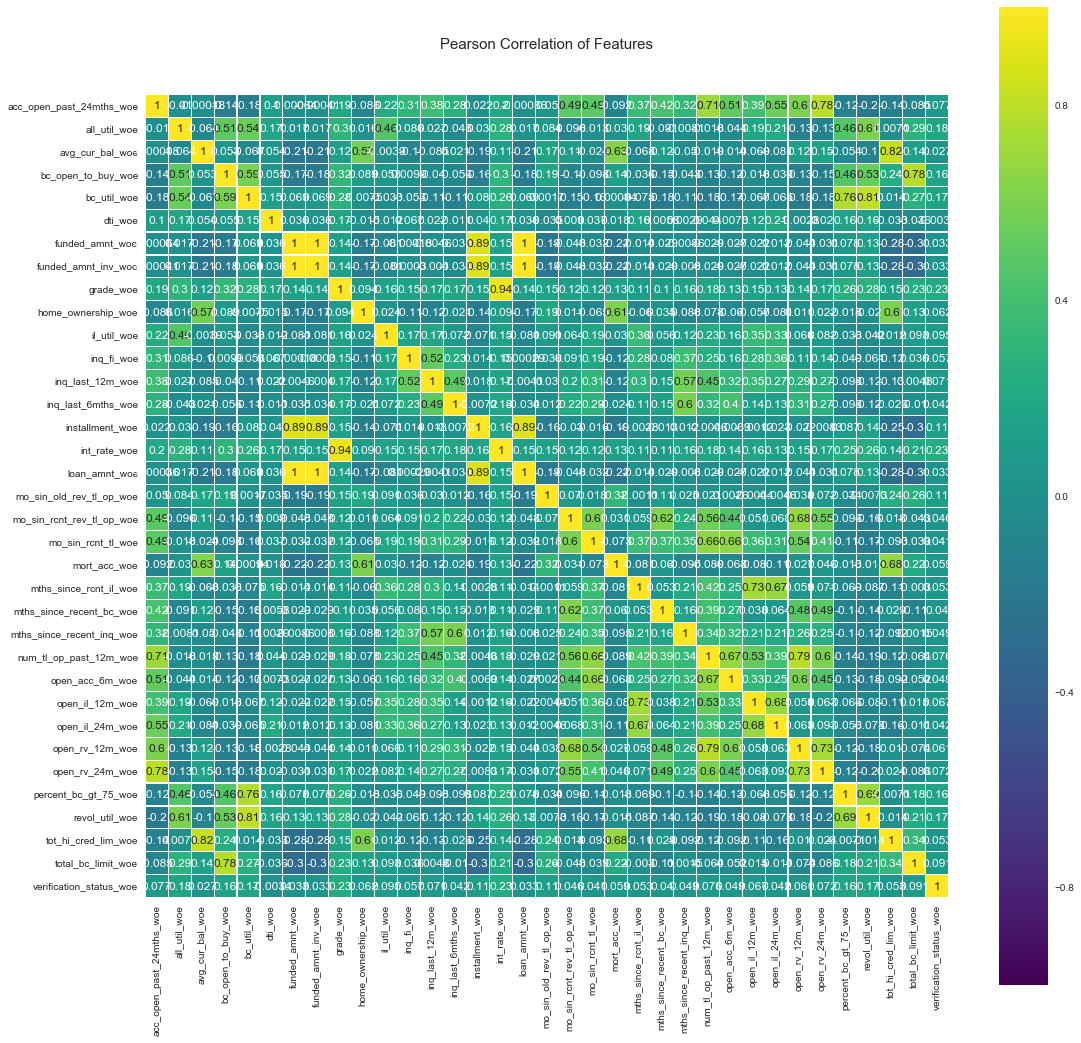

In [96]:
pearson_coef = plot_pearson(woe_exchange)
plt.show()

### 皮尔森相关性分析结果保存

In [98]:
pearson_coef.to_csv('C:\\Users\\Administrator\\Desktop\\version_0607\\pearson_coef0607.csv')

### 筛选出相关性高，但是iv值低的变量，并执行删除.

In [99]:
# 14个相关性较低，但iv较高的建模变量
model_var = ['int_rate_woe','acc_open_past_24mths_woe','verification_status_woe','inq_last_6mths_woe','inq_last_12m_woe',
'all_util_woe','inq_fi_woe','installment_woe','open_il_24m_woe','il_util_woe','bc_open_to_buy_woe','dti_woe',
'home_ownership_woe','mo_sin_old_rev_tl_op_woe']

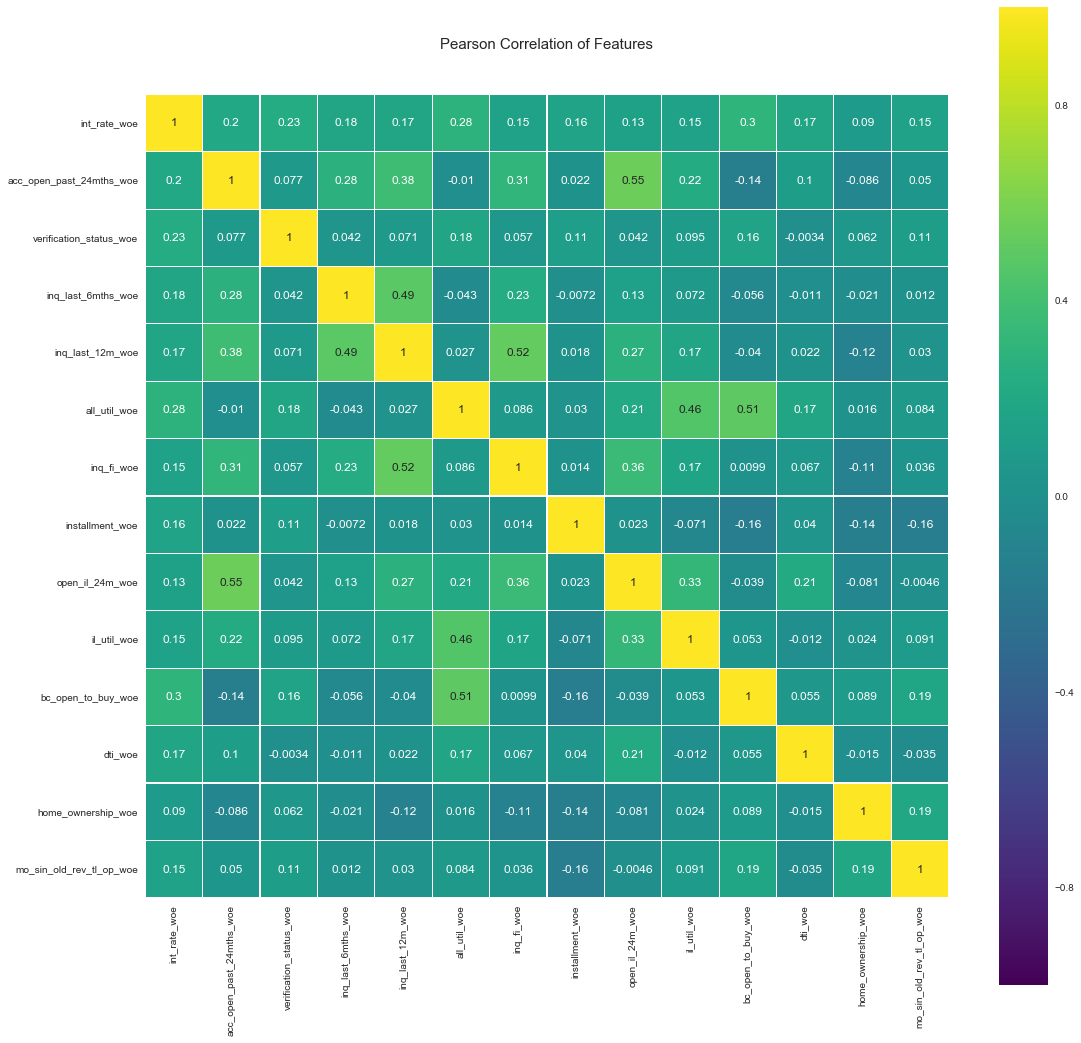

In [103]:
pearson_coef = plot_pearson(x_data)
plt.show()

In [100]:
x_data = woe_exchange[model_var]
y_data = loandata_bin['y']

In [101]:
x_data.tail(5)

,int_rate_woe,acc_open_past_24mths_woe,verification_status_woe,inq_last_6mths_woe,inq_last_12m_woe,all_util_woe,inq_fi_woe,installment_woe,open_il_24m_woe,il_util_woe,bc_open_to_buy_woe,dti_woe,home_ownership_woe,mo_sin_old_rev_tl_op_woe
170968,1.258155,0.388116,0.173584,0.161148,0.086056,-0.472214,0.038926,0.209698,0.226542,0.002284,-0.132344,-0.213696,0.176538,-0.211238
170969,-1.412743,-0.125913,0.173584,-0.181867,-0.233905,-0.472214,-0.200917,-0.045069,-0.289705,-0.229824,-0.404879,-0.009020,-0.188396,-0.211238
170970,0.637538,0.388116,-0.440456,0.161148,-0.233905,-0.274086,-0.200917,-0.045069,-0.289705,0.002284,0.127181,-0.009020,0.176538,-0.211238
170971,-0.447762,-0.388858,0.173584,-0.181867,0.086056,0.033565,0.220735,-0.297920,0.085814,0.002284,0.127181,-0.009020,0.176538,-0.211238
170972,1.258155,-0.125913,0.173584,-0.181867,-0.233905,0.222253,0.220735,0.209698,0.085814,0.002284,0.127181,0.266007,-0.188396,-0.083954


In [102]:
y_data.tail(5)

170968    0
170969    0
170970    0
170971    0
170972    1
Name: y, dtype: int64

### 训练数据、测试数据进行切分

In [105]:
# 训练数据、测试数据进行切分

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data,y_data,test_size=0.25)

In [106]:
# 构建分类器进行训练，并初始化分类器

from sklearn.linear_model import LogisticRegression as LR
lr = LR(class_weight='balanced') # 构建逻辑回归分类器
LR_model = lr.fit(X_train,Y_train)  # 模型训练

In [107]:
lr.score(X_test,Y_test)

0.65716825753322106

In [108]:
Y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
# 查看预测结果的准确率
accuracy_score(Y_test,Y_pred)

0.65716825753322106

In [109]:
lr.coef_

array([[ 0.79585493,  0.39805039,  0.35334877,  0.39363795,  0.14360474,
        -0.03835558,  0.27058835,  0.57976989,  0.02595542,  0.24659235,
         0.39815168,  0.34705874,  0.94385724,  0.30076539]])

In [110]:
lr.intercept_

array([-0.00145149])

In [111]:
lr.n_iter_

array([5], dtype=int32)

In [112]:
lr.get_params(deep = True)

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### 混淆矩阵

In [113]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[26656, 13921],
       [  733,  1434]], dtype=int64)

Confusion matrix, without normalization
[[26656 13921]
 [  733  1434]]
Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.34  0.66]]


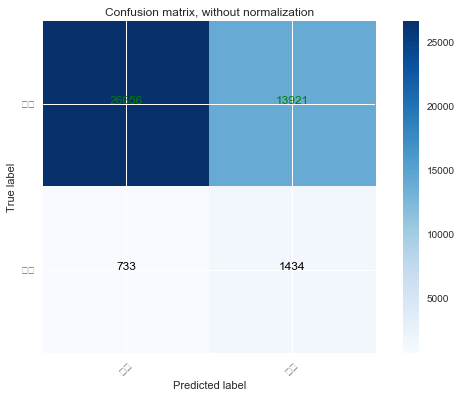

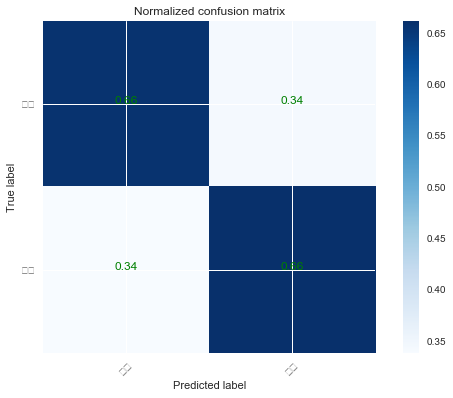

In [114]:
import itertools

class_names = ['正常', '逾期']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [115]:
from sklearn import metrics

y = np.array(Y_test)

from sklearn.metrics import roc_auc_score

y_score = lr.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_score[:,1])

roc = metrics.auc(fpr, tpr)
print('AUC =',roc)

AUC = 0.717789762464


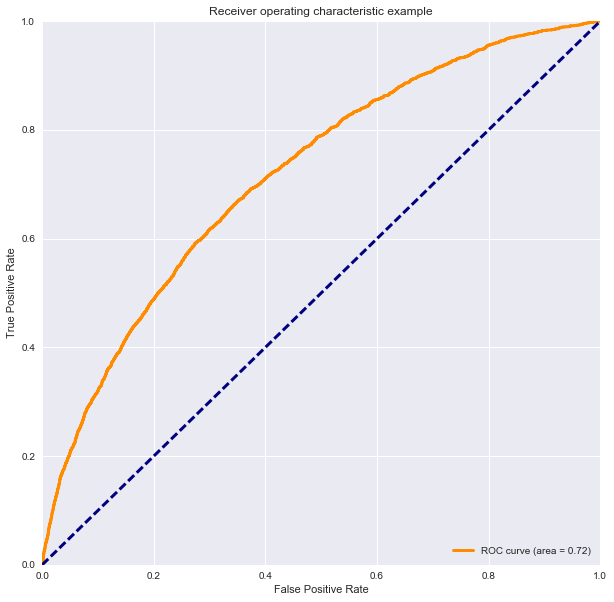

In [116]:
plt.figure()  
lw = 3  
plt.figure(figsize=(10,10))  
plt.plot(fpr, tpr, color='darkorange',  
         lw=lw, label='ROC curve (area = %0.2f)' % roc) ###假正率为横坐标，真正率为纵坐标做曲线  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()

## K-S值计算

In [118]:
predictions_prob = pd.DataFrame(lr.predict_proba(X_test))          # 返回模型中每个类的样本概率，其中类按照原样排序self.classes_.
predictions_prob['y'] = Y_test.get_values()                        # 目标变量的实际值
predictions_prob['y_pred'] = pd.DataFrame(lr.predict(X_test))      # Y_test.get_values()  # 目标变量的预测值
predictions_prob.head(5)

,0,1,y,y_pred
0,0.631104,0.368896,0,0
1,0.537806,0.462194,0,0
2,0.800996,0.199004,0,0
3,0.451457,0.548543,0,1
4,0.709781,0.290219,0,0


In [119]:
predictions_prob.rename(index = str,columns = {0:'P_0',1:'P_1','y':'y_test'},inplace = True)

predictions_prob.sort_values(by=['P_1'],ascending=False,inplace = True)

# 重新设置索引，并展示倒数5行
predictions_prob.reset_index(drop=True,inplace = True)

predictions_prob.tail(5)

,P_0,P_1,y_test,y_pred
42739,0.910871,0.089129,0,0
42740,0.911659,0.088341,0,0
42741,0.911899,0.088101,0,0
42742,0.914957,0.085043,0,0
42743,0.916607,0.083393,0,0


In [120]:
# KS值计算
def plot_ks_figure(predictions_prob):    
    ks_file = pd.DataFrame({'thresholds' : np.arange(0,11,1)},columns = ['thresholds','bad_cnt','good_cnt','good_per','bad_per','ks'])
    for m in np.arange(0,1.1,0.1):        
        
        ks_file['bad_cnt'][ks_file['thresholds'] == m*10] = (predictions_prob.ix[:int(len(predictions_prob)*m),'y_test'])[predictions_prob['y_test'] == 1].count()
        
        ks_file['good_cnt'][ks_file['thresholds'] == m*10] = (predictions_prob.ix[:int(len(predictions_prob)*m),'y_test'])[predictions_prob['y_test'] == 0].count()
    
    ks_file['bad_cnt'][ks_file['thresholds'] == 0.3*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.3),'P_1'])[predictions_prob['y_test'] == 1].count()
    ks_file['good_cnt'][ks_file['thresholds'] == 0.3*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.3),'P_1'])[predictions_prob['y_test'] == 0].count()
    ks_file['bad_cnt'][ks_file['thresholds'] == 0.7*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.7),'P_1'])[predictions_prob['y_test'] == 1].count()
    ks_file['good_cnt'][ks_file['thresholds'] == 0.7*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.7),'P_1'])[predictions_prob['y_test'] == 0].count()
    ks_file['bad_cnt'][ks_file['thresholds'] == 0.6*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.6),'P_1'])[predictions_prob['y_test'] == 1].count()
    ks_file['good_cnt'][ks_file['thresholds'] == 0.6*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.6),'P_1'])[predictions_prob['y_test'] == 0].count()
        
    ks_file['good_per'] = ks_file['good_cnt']/predictions_prob['y_test'][predictions_prob['y_test'] == 0].count()
    
    ks_file['bad_per'] = ks_file['bad_cnt']/predictions_prob['y_test'][predictions_prob['y_test'] == 1].count()
    
    ks_file['ks'] = abs(ks_file['good_per'] - ks_file['bad_per'])   
        
    return ks_file

In [121]:
ks_file = plot_ks_figure(predictions_prob)

ks_file

,thresholds,bad_cnt,good_cnt,good_per,bad_per,ks
0,0,0,1,2.46445e-05,0,2.46445e-05
1,1,657,3618,0.0891638,0.303184,0.21402
2,2,1010,7539,0.185795,0.466082,0.280287
3,3,1296,11528,0.284102,0.598062,0.31396
4,4,1509,15589,0.384183,0.696354,0.312171
5,5,1683,19690,0.48525,0.77665,0.291399
6,6,1836,23811,0.58681,0.847254,0.260444
7,7,1960,27961,0.689085,0.904476,0.215391
8,8,2058,32138,0.792025,0.9497,0.157675
9,9,2129,36341,0.895606,0.982464,0.0868584


In [122]:
ks_value = ks_file['ks'].max()

print('KS = ',round(ks_value,3))

KS =  0.314


In [123]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示负号

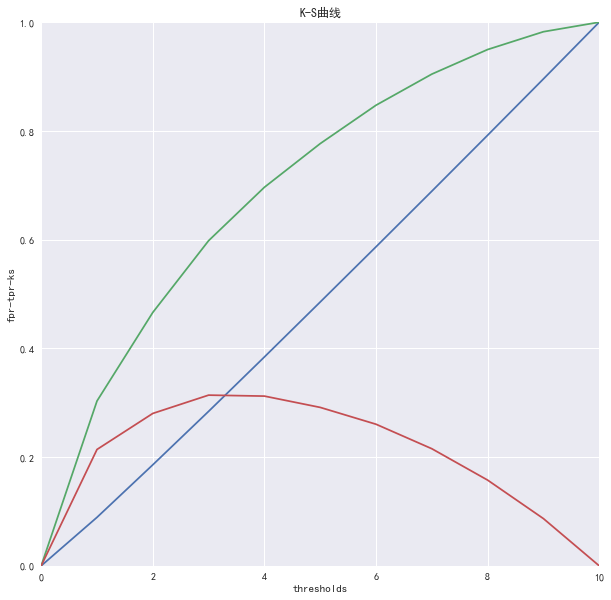

KS =  0.314


In [124]:
# K-S作图
plt.figure()  
lw = 3  
plt.figure(figsize=(10,10))  

# plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc) ###假正率为横坐标，真正率为纵坐标做曲线 
plt.plot(ks_file['thresholds'],ks_file['good_per'],label='fpr')  
plt.plot(ks_file['thresholds'],ks_file['bad_per'],label='tpr')
plt.plot(ks_file['thresholds'],ks_file['ks'],label='ks')

# label='ROC curve (area = %0.2f)' % ks_value

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0, 10])  
plt.ylim([0, 1])  
plt.xlabel('thresholds')  
plt.ylabel('fpr-tpr-ks')  
plt.title('K-S曲线')  
# plt.legend(loc="lower right")  
plt.show()

print('KS = ',round(ks_value,3))

### 评分卡生成

In [125]:
def get_lr_formula(model,X):
    '''返回回归系数和截距'''
    intercept = pd.DataFrame(model.intercept_) #截距
    coef = model.coef_.T   #模型(回归)系数(相关系数)
    coef = pd.DataFrame(coef)   
    formula = pd.concat([intercept,coef])
    index = ['Intercept']
    index = index + list(X.columns)
    formula.index = index
    formula.reset_index(inplace=True)
    formula.columns = [u'参数',u'估计值']
    return formula

In [126]:
formula = get_lr_formula(LR_model,X_train)

In [127]:
formula

,参数,估计值
0,Intercept,-0.001451
1,int_rate_woe,0.795855
2,acc_open_past_24mths_woe,0.398050
3,verification_status_woe,0.353349
4,inq_last_6mths_woe,0.393638
5,inq_last_12m_woe,0.143605
6,all_util_woe,-0.038356
7,inq_fi_woe,0.270588
8,installment_woe,0.579770
9,open_il_24m_woe,0.025955


In [128]:
def make_scorecard(formular,woe,basescore=600.0,base_odds=20.0/1.0,pdo=20.0):
    """
    一般行业规则，一般设定当odds为50时，score为600
    Odds翻倍时，score+20
    score = -(woe*b +a/n)*factor + offset/n
    factor = pdo/np.log(2)
    offset = basescore - factor*np.log(base_odds)

    """
    a = formular[formular[u"参数"] == "Intercept"].ix[0,u"估计值"]
    formular = formular.iloc[1:,:]
    n = float(len(formular))
    factor = pdo/np.log(2)
    offset = basescore - factor*np.log(base_odds)
    #生成评分卡
    scorecard = pd.DataFrame()
    for i in formular[u"参数"]:
        woe_frame = woe[woe['var_name'] == i][['var_name','interval','WOE']]
        beta_i = formular[formular[u"参数"] == i][u"估计值"].iloc[0]
        #woe_frame['score'] = woe_frame['WOE'].apply(lambda woe : offset/n - factor*(a/n-np.abs(beta_i)*woe))
        woe_frame['score'] = woe_frame['WOE'].apply(lambda woe : offset/n - factor*(a/n+beta_i*woe))
        scorecard = pd.concat((scorecard,woe_frame),axis=0)
        
    return scorecard

In [131]:
bin_handle.head(5)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot,woe,iv0,iv
bin,,,,,,,,,,,,,,,
1,1,0,loan_amnt_bin,1,999.000000,7489.294663,1718,40003,41721,4.1%,8740,162233,-0.226670,0.011336,0.021503
2,2,1,loan_amnt_bin,2,7489.294663,13736.016850,2396,46835,49231,4.9%,8740,162233,-0.051707,0.000752,0.021503
3,3,2,loan_amnt_bin,3,13736.016850,21745.017810,2393,40556,42949,5.6%,8740,162233,0.090987,0.002167,0.021503
4,4,3,loan_amnt_bin,4,21745.017810,30926.297120,1338,21332,22670,5.9%,8740,162233,0.152091,0.003285,0.021503
5,5,4,loan_amnt_bin,5,30926.297120,40000.000000,895,13507,14402,6.2%,8740,162233,0.206984,0.003963,0.021503


In [133]:
bin_handle.shape

(373, 15)

In [147]:
# 14个相关性较低，但iv较高的建模变量
# 原结尾_woe改为结尾_bin
model_varib = ['int_rate_bin','acc_open_past_24mths_bin','verification_status_bin','inq_last_6mths_bin','inq_last_12m_bin',
'all_util_bin','inq_fi_bin','installment_bin','open_il_24m_bin','il_util_bin','bc_open_to_buy_bin','dti_bin',
'home_ownership_bin','mo_sin_old_rev_tl_op_bin']

In [148]:
bin_handle0 = bin_handle[bin_handle['var_name'].isin(model_varib) ==True]

In [149]:
bin_handle0.shape

(65, 15)

In [150]:
bin_handle0['interval'] = bin_handle0['bin']
bin_handle0['WOE'] = bin_handle0['woe']
bin_handle0['var_name'] = bin_handle0['var_name'].str.replace('_bin','_woe')
# data['revol_util'] = data['revol_util'].str.replace('%',' ')
bin_handle0.head(6)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot,woe,iv0,iv,interval,WOE
bin,,,,,,,,,,,,,,,,,
1,18,0,int_rate_woe,1,4.320000,9.308011,478,36442,36920,1.3%,8740,162233,-1.412743,0.240077,0.560310,1,-1.412743
2,19,1,int_rate_woe,2,9.308011,13.055468,1908,55420,57328,3.3%,8740,162233,-0.447762,0.055209,0.560310,2,-0.447762
3,20,2,int_rate_woe,3,13.055468,16.549222,2650,42757,45407,5.8%,8740,162233,0.140150,0.005557,0.560310,3,0.140150
4,21,3,int_rate_woe,4,16.549222,22.362237,1780,17465,19245,9.2%,8740,162233,0.637538,0.061208,0.560310,4,0.637538
5,22,4,int_rate_woe,5,22.362237,30.990000,1924,10149,12073,15.9%,8740,162233,1.258155,0.198259,0.560310,5,1.258155
1,23,0,installment_woe,1,29.120000,244.657411,1675,41882,43557,3.8%,8740,162233,-0.297920,0.019815,0.047097,1,-0.297920


In [151]:
card = make_scorecard(formula,bin_handle0,basescore=600.0,base_odds=20.0/1.0,pdo=20.0)

In [153]:
card.head(5)

,var_name,interval,WOE,score
bin,,,,
1,int_rate_woe,1,-1.412743,69.127505
2,int_rate_woe,2,-0.447762,46.968133
3,int_rate_woe,3,0.140150,33.467612
4,int_rate_woe,4,0.637538,22.045838
5,int_rate_woe,5,1.258155,7.794295


In [156]:
cards = pd.merge(bin_handle0,card,how ='inner',on=['var_name','interval'])

## 评分卡结果20180608

In [158]:
cards.head(10)

,No,bins,var_name,bin,lower,upper,flag_1,flag_0,total,1_percent,flag1_tot,flag0_tot,woe,iv0,iv,interval,WOE_x,WOE_y,score
0,18,0,int_rate_woe,1,4.320000,9.308011,478,36442,36920,1.3%,8740,162233,-1.412743,0.240077,0.560310,1,-1.412743,-1.412743,69.127505
1,19,1,int_rate_woe,2,9.308011,13.055468,1908,55420,57328,3.3%,8740,162233,-0.447762,0.055209,0.560310,2,-0.447762,-0.447762,46.968133
2,20,2,int_rate_woe,3,13.055468,16.549222,2650,42757,45407,5.8%,8740,162233,0.140150,0.005557,0.560310,3,0.140150,0.140150,33.467612
3,21,3,int_rate_woe,4,16.549222,22.362237,1780,17465,19245,9.2%,8740,162233,0.637538,0.061208,0.560310,4,0.637538,0.637538,22.045838
4,22,4,int_rate_woe,5,22.362237,30.990000,1924,10149,12073,15.9%,8740,162233,1.258155,0.198259,0.560310,5,1.258155,1.258155,7.794295
5,23,0,installment_woe,1,29.120000,244.657411,1675,41882,43557,3.8%,8740,162233,-0.297920,0.019815,0.047097,1,-0.297920,-0.297920,41.669736
6,24,1,installment_woe,2,244.657411,435.329388,2745,53302,56047,4.9%,8740,162233,-0.045069,0.000653,0.047097,2,-0.045069,-0.045069,37.439900
7,25,2,installment_woe,3,435.329388,666.538871,1985,35280,37265,5.3%,8740,162233,0.043426,0.000419,0.047097,3,0.043426,0.043426,35.959493
8,26,3,installment_woe,4,666.538871,966.217907,1400,21071,22471,6.2%,8740,162233,0.209698,0.006354,0.047097,4,0.209698,0.209698,33.177994
9,27,4,installment_woe,5,966.217907,1719.830000,935,10698,11633,8.0%,8740,162233,0.483858,0.019856,0.047097,5,0.483858,0.483858,28.591676


### 最终结果保存 

In [159]:
cards.to_csv('C:\\Users\\Administrator\\Desktop\\version_0607\\cards0608.csv')

## 2018年6月8日凌晨，取得阶段性的成果！！！！！！！！！！！

## 知乎K-S统计表

In [160]:
def ks_stats(prob_y, y, k=20):
    """
    plot K-S curve and output ks table
    ----------------------------------
    Params
    prob_y: prediction of model
    y: real data(testing sets)
    k: Section number 
    ----------------------------------
    ks_results: pandas dataframe 
    ks_ax: plt object, k-s curcve
    """
    # 检查y是否是二元变量
    # y_type = type_of_target(y)
    # if y_type not in ['binary']:
    #    raise ValueError('y必须是二元变量')
    # 合并y与y_hat,并按prob_y对数据进行降序排列
    datasets = pd.concat([y, pd.Series(prob_y, name='prob_y', index=y.index)], axis=1)
    datasets.columns = ["y", "prob_y"]
    datasets = datasets.sort_values(by="prob_y", axis=0, ascending=True)
    # 计算正负案例数和行数,以及等分子集的行数n
    P = sum(y)
    Nrows = datasets.shape[0]
    N = Nrows - P
    n = float(Nrows)/k
    # 重建索引，并将数据划分为子集，并计算每个子集的正例数和负例数
    datasets.index = np.arange(Nrows)
    ks_df = pd.DataFrame()
    rlt = {
            "tile":str(0),
            "Ptot":0,
            "Ntot":0}
    ks_df = ks_df.append(pd.Series(rlt), ignore_index=True)
    for i in range(k):
        lo = i*n
        up = (i+1)*n
        tile = datasets.ix[lo:(up-1), :]
        Ptot = sum(tile['y'])
        Ntot = n-Ptot
        rlt = {
                "tile":str(i+1),
                "Ptot":Ptot,
                "Ntot":Ntot}
        ks_df = ks_df.append(pd.Series(rlt), ignore_index=True)
    # 计算各子集中的正负例比例,以及累积比例
    ks_df['PerP'] = ks_df['Ptot']/P
    ks_df['PerN'] = ks_df['Ntot']/N
    ks_df['PerP_cum'] = ks_df['PerP'].cumsum()
    ks_df['PerN_cum'] = ks_df['PerN'].cumsum()
    # 计算ks曲线以及ks值
    ks_df['ks'] = ks_df['PerN_cum'] - ks_df['PerP_cum']
    ks_value = ks_df['ks'].max()
    s = "KS value is %.4f" % ks_value
    # 整理得出ks统计表
    ks_results = ks_df.ix[1:,:]
    ks_results = ks_results[['tile', 'Ntot', 'Ptot', 'PerN', 'PerP', 'PerN_cum', 'PerP_cum', 'ks']]
    ks_results.columns = ['子集','负例数','正例数','负例比例','正例比例','累积负例比例','累积正例比例', 'ks']
    # 获取ks值所在的数据点
    ks_point = ks_results.ix[:,['子集','ks']]
    ks_point = ks_point.ix[ks_point['ks']==ks_point['ks'].max(),:]
    # 绘制KS曲线
    ks_ax = _ks_plot(ks_df=ks_df, ks_label='ks', good_label='PerN_cum', bad_label='PerP_cum', 
                    k=k, point=ks_point, s=s)
    return ks_results, ks_ax

In [162]:
def _ks_plot(ks_df, ks_label, good_label, bad_label, k, point, s):
    """
    middle function for ks_stats, plot k-s curve
    """
    plt.plot(ks_df['tile'], ks_df[ks_label], "r-.", label="ks_curve", lw=1.2)
    plt.plot(ks_df['tile'], ks_df[good_label], "g-.", label="good", lw=1.2)
    plt.plot(ks_df['tile'], ks_df[bad_label], "m-.", label="bad", lw=1.2)
    #plt.plot(point[0], point[1], 'o', markerfacecolor="red",
             #markeredgecolor='k', markersize=6)
    plt.legend(loc=0)
    plt.plot([0, k], [0, 1], linestyle='--', lw=0.8, color='k', label='Luck')
    plt.xlabel("decilis")#等份子集
    plt.title(s)#KS曲线图
    plt.show()

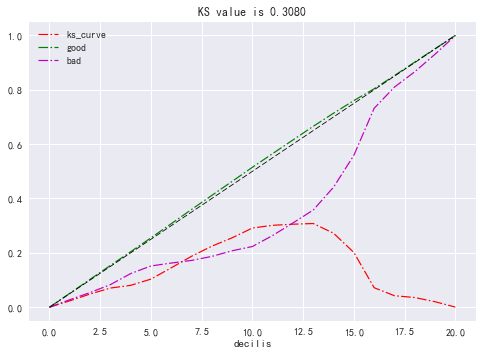

In [163]:
# ks_results0, ks_ax0 =ks_stats(prob_y, y, k=20)

ks_results0, ks_ax0 =ks_stats(predictions_prob['y_pred'], predictions_prob['y_test'], k=20)

### 用随机森林进行特征重要性排序筛选

In [83]:
woe_df_xy = pd.concat([woe_df,y],axis=1)

In [84]:
names = woe_df_xy.columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123) # 构建分类随机森林分类器
clf.fit(woe_df, y) # 对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('loan_amnt_BIN_WOE', 0.018879372802016618)
('funded_amnt_BIN_WOE', 0.017913632265124709)
('int_rate_BIN_WOE', 0.016476718736976939)
('funded_amnt_inv_BIN_WOE', 0.018881762482105869)
('installment_BIN_WOE', 0.025442219836475061)
('dti_BIN_WOE', 0.038452997665495606)
('revol_util_BIN_WOE', 0.02738225419734967)
('tot_cur_bal_BIN_WOE', 0.03191722937441669)
('il_util_BIN_WOE', 0.035130355832552841)
('all_util_BIN_WOE', 0.030279524740043817)
('bc_open_to_buy_BIN_WOE', 0.027111590792772977)
('bc_util_BIN_WOE', 0.030313194732338483)
('percent_bc_gt_75_BIN_WOE', 0.032041790500586045)
('tot_hi_cred_lim_BIN_WOE', 0.024110781954836843)
('total_bc_limit_BIN_WOE', 0.030489054253160112)
('grade_BIN_WOE', 0.021785267180304775)
('home_ownership_BIN_WOE', 0.020377501750734356)
('inq_last_6mths_BIN_WOE', 0.023620852946805999)
('open_acc_6m_BIN_WOE', 0.030584823688988044)
('open_il_12m_BIN_WOE', 0.022937229897176274)
('open_il_24m_BIN_WOE', 0.03082477275157346)
('mths_since_rcnt_il_BIN_WOE', 0.0216635402

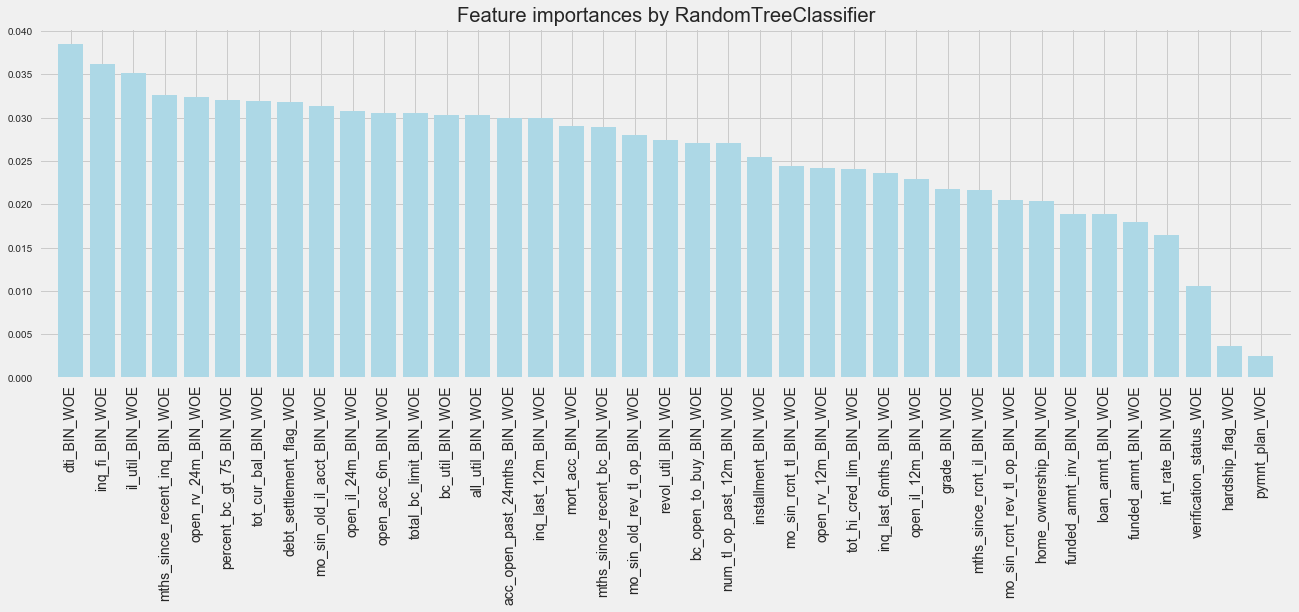

In [85]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# feature importances 可视化
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
# plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## 剩余39个变量相关性分析

#### 用皮尔森相关系数检测变量间的多重共线性问题.

In [86]:
import seaborn as sns    #数据可视化模块

In [87]:
###绘出皮尔森相关系数图谱
def plot_pearson(data):
    '''
    我们在第一次降维的基础上，通过皮尔森相关性图谱找出冗余特征并将其剔除；
    同时，可以通过相关性图谱进一步引导我们选择特征的方向。
    小于0.4显著弱相关，0.4-0.75中等相关，大于0.75强相关
    '''
    colormap = plt.cm.viridis
    plt.figure(figsize=(18,18))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    pearson_coef = data.corr()
    sns.heatmap(pearson_coef,linewidths=0.1,vmax=1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True)
    return pearson_coef

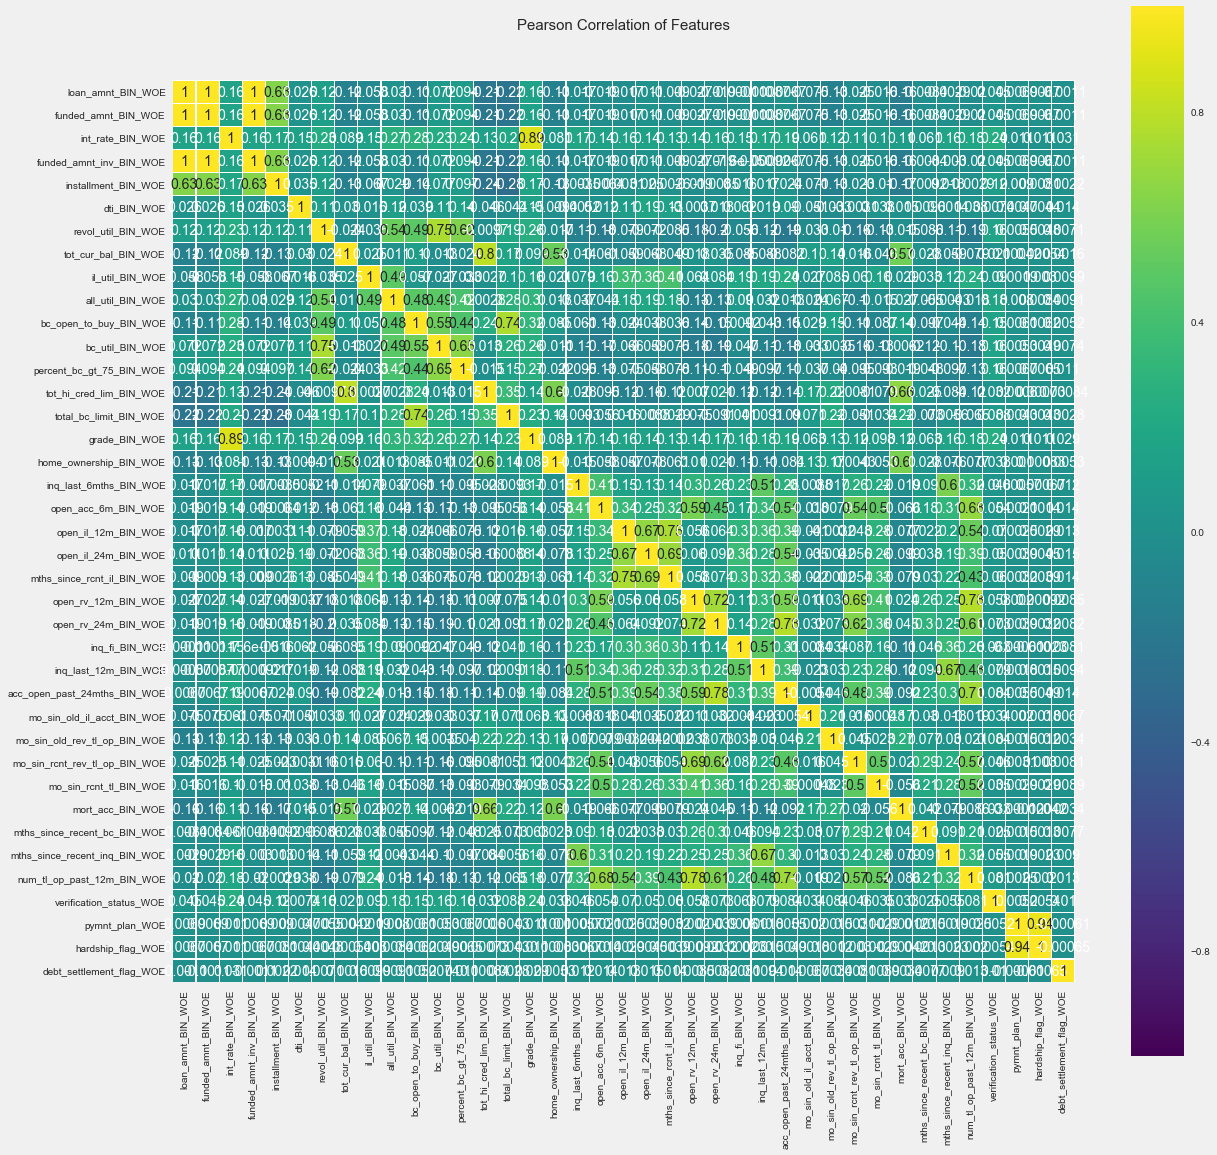

In [88]:
pearson_coef = plot_pearson(woe_df)
plt.show()

In [89]:
# pearson_coef

In [90]:
# 公司保存
# pearson_coef_reslut0515.to_csv('C:\\Users\\xn070576\\Desktop\\lending_club\\pearson_coef_reslut0515')

# 家保存
# pearson_coef.to_csv('C:\\Users\\Administrator\\Desktop\\lending_club_data\\pearson_coef_reslut0515.csv')

### 为防止多重共线性，删除相关性系数大于0.6的几个变量.

In [91]:
model_var = ['grade_BIN','debt_settlement_flag','acc_open_past_24mths_BIN','verification_status','mths_since_recent_inq_BIN',
'hardship_flag','mths_since_recent_bc_BIN','installment_BIN','all_util_BIN','inq_fi_BIN','open_il_24m_BIN','mo_sin_rcnt_tl_BIN','il_util_BIN',         
'bc_open_to_buy_BIN','dti_BIN','home_ownership_BIN','percent_bc_gt_75_BIN','mo_sin_rcnt_rev_tl_op_BIN','mo_sin_old_il_acct_BIN',
'tot_hi_cred_lim_BIN']

In [92]:
var_model = ['grade_BIN_WOE','debt_settlement_flag_WOE','acc_open_past_24mths_BIN_WOE','verification_status_WOE','mths_since_recent_inq_BIN_WOE',
'hardship_flag_WOE','mths_since_recent_bc_BIN_WOE','installment_BIN_WOE','all_util_BIN_WOE','inq_fi_BIN_WOE','open_il_24m_BIN_WOE','mo_sin_rcnt_tl_BIN_WOE','il_util_BIN_WOE',  
'bc_open_to_buy_BIN_WOE','dti_BIN_WOE','home_ownership_BIN_WOE','percent_bc_gt_75_BIN_WOE','mo_sin_rcnt_rev_tl_op_BIN_WOE','mo_sin_old_il_acct_BIN_WOE',
'tot_hi_cred_lim_BIN_WOE']

In [93]:
woe_df_model = woe_df[var_model]

In [94]:
woe_df_model.tail(5)

,grade_BIN_WOE,debt_settlement_flag_WOE,acc_open_past_24mths_BIN_WOE,verification_status_WOE,mths_since_recent_inq_BIN_WOE,hardship_flag_WOE,mths_since_recent_bc_BIN_WOE,installment_BIN_WOE,all_util_BIN_WOE,inq_fi_BIN_WOE,open_il_24m_BIN_WOE,mo_sin_rcnt_tl_BIN_WOE,il_util_BIN_WOE,bc_open_to_buy_BIN_WOE,dti_BIN_WOE,home_ownership_BIN_WOE,percent_bc_gt_75_BIN_WOE,mo_sin_rcnt_rev_tl_op_BIN_WOE,mo_sin_old_il_acct_BIN_WOE,tot_hi_cred_lim_BIN_WOE
274061,1.293603,-0.037831,0.256495,0.189002,-0.026462,-0.006589,0.146736,0.415176,0.035037,-0.205389,0.116680,0.021919,0.213546,0.157726,0.323396,0.169832,0.166802,0.019659,-0.083437,-0.013273
274062,1.293603,-0.037831,0.552212,0.189002,-0.026462,-0.006589,0.146736,0.174481,0.217558,0.677578,0.430499,0.201894,0.213546,0.157726,0.107947,-0.184611,-0.251902,0.176117,-0.083437,-0.173980
274063,1.293603,-0.037831,-0.027811,0.189002,0.184739,-0.006589,-0.038538,0.415176,0.035037,0.024850,0.116680,-0.218025,0.213546,-0.143888,0.107947,0.169832,0.074517,0.019659,0.487418,0.141456
274064,1.293603,-0.037831,-0.391094,0.189002,0.399951,-0.006589,-0.149673,0.415176,-0.378947,0.371951,0.116680,-0.543945,-0.089116,0.041658,-0.142235,0.169832,0.166802,-0.264259,-0.022814,0.141456
274065,1.293603,-0.037831,-0.027811,0.189002,0.399951,-0.006589,-0.617216,0.174481,0.217558,0.371951,0.116680,0.201894,0.213546,0.157726,0.107947,0.169832,0.166802,0.176117,-0.022814,0.141456


### 截止当前，剩余20个建模变量.

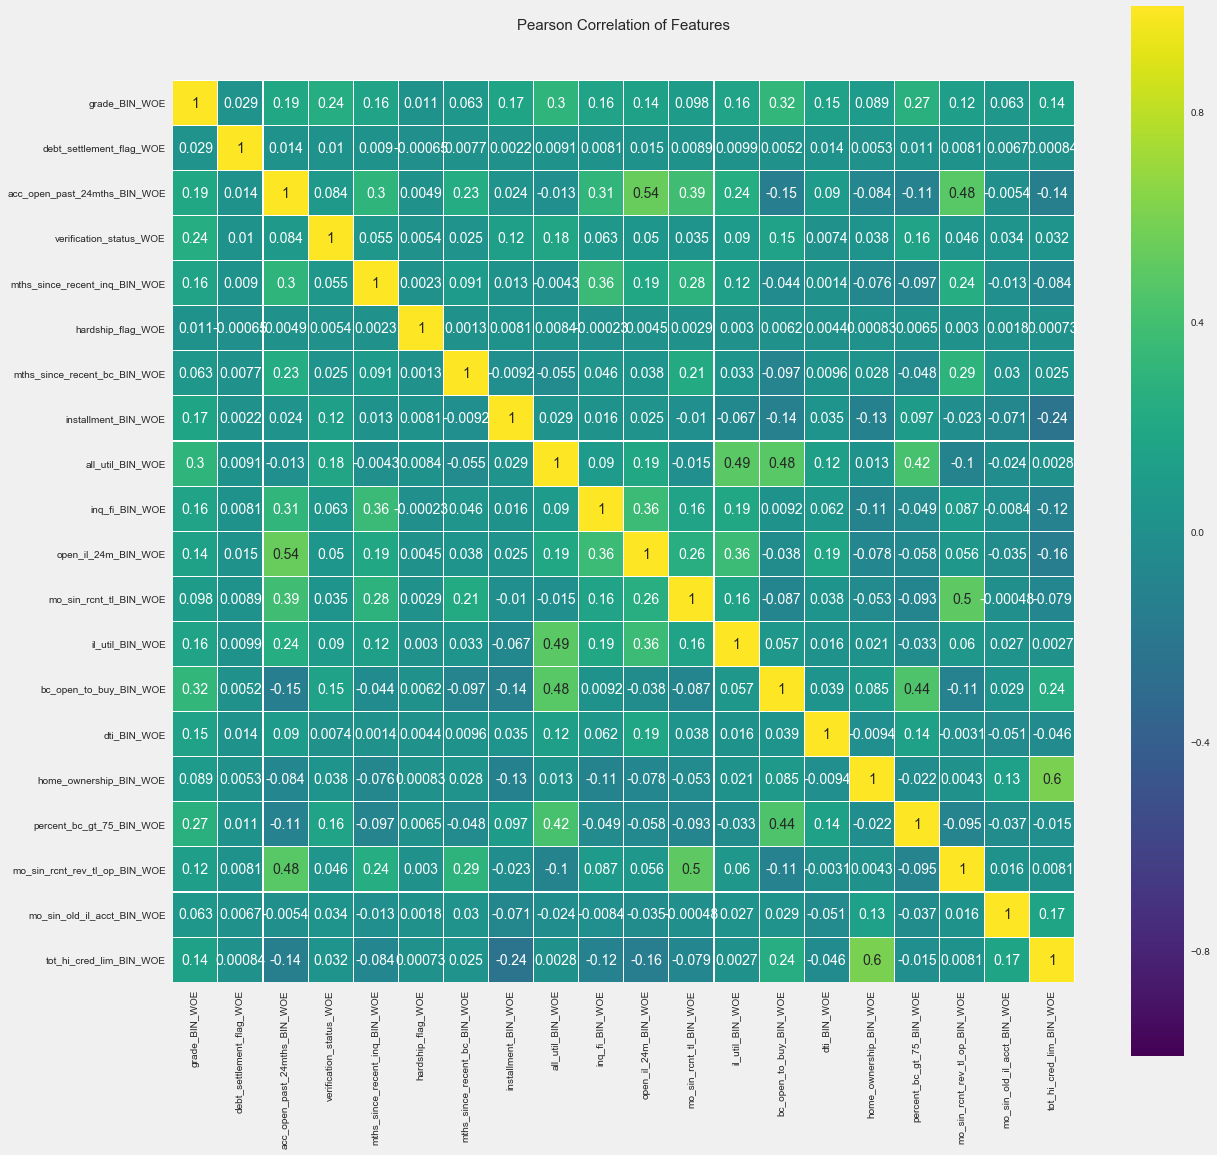

In [95]:
pearson_coef = plot_pearson(woe_df_model)
plt.show()

In [96]:
woe_df_model_xy = pd.concat([woe_df_model,y],axis=1)

In [97]:
namess = woe_df_model_xy.columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123) # 构建分类随机森林分类器
clf.fit(woe_df_model, y) # 对自变量和因变量进行拟合
namess, clf.feature_importances_
for feature in zip(namess, clf.feature_importances_):
    print(feature)

('grade_BIN_WOE', 0.043089431345247099)
('debt_settlement_flag_WOE', 0.035385096391261237)
('acc_open_past_24mths_BIN_WOE', 0.052648851756424239)
('verification_status_WOE', 0.014872557472821823)
('mths_since_recent_inq_BIN_WOE', 0.059660207043055594)
('hardship_flag_WOE', 0.0060001577207369396)
('mths_since_recent_bc_BIN_WOE', 0.052673972855902772)
('installment_BIN_WOE', 0.063673961405857127)
('all_util_BIN_WOE', 0.051440235415421108)
('inq_fi_BIN_WOE', 0.068290629813422266)
('open_il_24m_BIN_WOE', 0.063591793512886713)
('mo_sin_rcnt_tl_BIN_WOE', 0.048636746850983625)
('il_util_BIN_WOE', 0.063145101877324555)
('bc_open_to_buy_BIN_WOE', 0.056145519251805762)
('dti_BIN_WOE', 0.068811704641431617)
('home_ownership_BIN_WOE', 0.038181650971864531)
('percent_bc_gt_75_BIN_WOE', 0.063828810177631409)
('mo_sin_rcnt_rev_tl_op_BIN_WOE', 0.043699821669439295)
('mo_sin_old_il_acct_BIN_WOE', 0.055702288141606951)
('tot_hi_cred_lim_BIN_WOE', 0.050521461684875348)


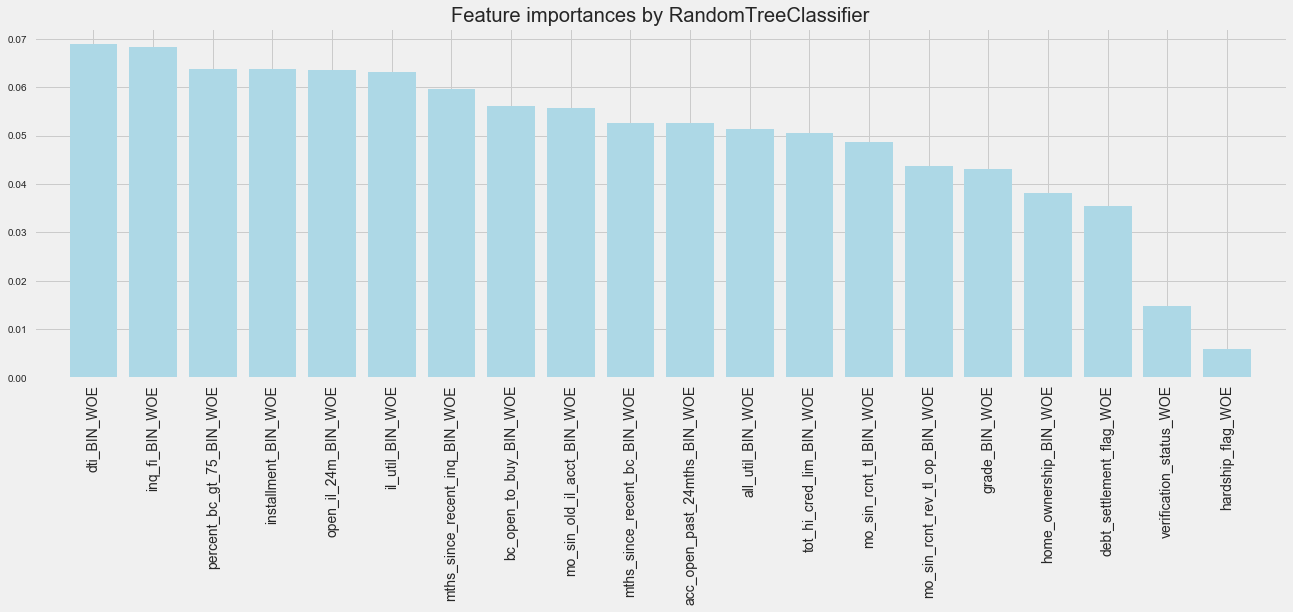

In [98]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# feature importances 可视化
importances = clf.feature_importances_
feat_names = namess
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
# plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

### 因变量与目标变量之间的相关性检测:

In [99]:
woe_df_model_xy_cor=woe_df_model_xy.corr(method ='pearson')[u'loan_status'].sort_values(ascending=False)  # 只显示'loan_status'与其他变量的相关系数
print(woe_df_model_xy_cor)

loan_status                      1.000000
debt_settlement_flag_WOE         0.188766
grade_BIN_WOE                    0.147466
hardship_flag_WOE                0.079341
acc_open_past_24mths_BIN_WOE     0.060119
verification_status_WOE          0.055244
mths_since_recent_inq_BIN_WOE    0.054295
installment_BIN_WOE              0.048418
inq_fi_BIN_WOE                   0.047724
open_il_24m_BIN_WOE              0.045948
all_util_BIN_WOE                 0.045547
il_util_BIN_WOE                  0.041035
bc_open_to_buy_BIN_WOE           0.036899
mo_sin_rcnt_tl_BIN_WOE           0.034342
home_ownership_BIN_WOE           0.034266
percent_bc_gt_75_BIN_WOE         0.033471
dti_BIN_WOE                      0.033021
mo_sin_old_il_acct_BIN_WOE       0.032994
mo_sin_rcnt_rev_tl_op_BIN_WOE    0.032882
mths_since_recent_bc_BIN_WOE     0.031388
tot_hi_cred_lim_BIN_WOE          0.028882
Name: loan_status, dtype: float64


In [100]:
woe_df_model_xy.tail(5)

,grade_BIN_WOE,debt_settlement_flag_WOE,acc_open_past_24mths_BIN_WOE,verification_status_WOE,mths_since_recent_inq_BIN_WOE,hardship_flag_WOE,mths_since_recent_bc_BIN_WOE,installment_BIN_WOE,all_util_BIN_WOE,inq_fi_BIN_WOE,...,mo_sin_rcnt_tl_BIN_WOE,il_util_BIN_WOE,bc_open_to_buy_BIN_WOE,dti_BIN_WOE,home_ownership_BIN_WOE,percent_bc_gt_75_BIN_WOE,mo_sin_rcnt_rev_tl_op_BIN_WOE,mo_sin_old_il_acct_BIN_WOE,tot_hi_cred_lim_BIN_WOE,loan_status
274061,1.293603,-0.037831,0.256495,0.189002,-0.026462,-0.006589,0.146736,0.415176,0.035037,-0.205389,...,0.021919,0.213546,0.157726,0.323396,0.169832,0.166802,0.019659,-0.083437,-0.013273,0
274062,1.293603,-0.037831,0.552212,0.189002,-0.026462,-0.006589,0.146736,0.174481,0.217558,0.677578,...,0.201894,0.213546,0.157726,0.107947,-0.184611,-0.251902,0.176117,-0.083437,-0.173980,1
274063,1.293603,-0.037831,-0.027811,0.189002,0.184739,-0.006589,-0.038538,0.415176,0.035037,0.024850,...,-0.218025,0.213546,-0.143888,0.107947,0.169832,0.074517,0.019659,0.487418,0.141456,0
274064,1.293603,-0.037831,-0.391094,0.189002,0.399951,-0.006589,-0.149673,0.415176,-0.378947,0.371951,...,-0.543945,-0.089116,0.041658,-0.142235,0.169832,0.166802,-0.264259,-0.022814,0.141456,1
274065,1.293603,-0.037831,-0.027811,0.189002,0.399951,-0.006589,-0.617216,0.174481,0.217558,0.371951,...,0.201894,0.213546,0.157726,0.107947,0.169832,0.166802,0.176117,-0.022814,0.141456,0


In [101]:
loandata_bin[['purpose','issue_d']].tail(5)

,purpose,issue_d
274061,debt_consolidation,Jul-17
274062,debt_consolidation,Jul-17
274063,debt_consolidation,Jul-17
274064,debt_consolidation,Jul-17
274065,medical,Jul-17


## 开发样本（训练数据&测试数据）和验证样本选择

### 开发样本和验证样本

根据issue_d字段对原始数据进行开发样本和验证样本分离.

In [102]:
data_all = pd.concat([woe_df_model_xy,loandata_bin['issue_d']],axis=1)

In [103]:
data_all.tail(5)

,grade_BIN_WOE,debt_settlement_flag_WOE,acc_open_past_24mths_BIN_WOE,verification_status_WOE,mths_since_recent_inq_BIN_WOE,hardship_flag_WOE,mths_since_recent_bc_BIN_WOE,installment_BIN_WOE,all_util_BIN_WOE,inq_fi_BIN_WOE,...,il_util_BIN_WOE,bc_open_to_buy_BIN_WOE,dti_BIN_WOE,home_ownership_BIN_WOE,percent_bc_gt_75_BIN_WOE,mo_sin_rcnt_rev_tl_op_BIN_WOE,mo_sin_old_il_acct_BIN_WOE,tot_hi_cred_lim_BIN_WOE,loan_status,issue_d
274061,1.293603,-0.037831,0.256495,0.189002,-0.026462,-0.006589,0.146736,0.415176,0.035037,-0.205389,...,0.213546,0.157726,0.323396,0.169832,0.166802,0.019659,-0.083437,-0.013273,0,Jul-17
274062,1.293603,-0.037831,0.552212,0.189002,-0.026462,-0.006589,0.146736,0.174481,0.217558,0.677578,...,0.213546,0.157726,0.107947,-0.184611,-0.251902,0.176117,-0.083437,-0.173980,1,Jul-17
274063,1.293603,-0.037831,-0.027811,0.189002,0.184739,-0.006589,-0.038538,0.415176,0.035037,0.024850,...,0.213546,-0.143888,0.107947,0.169832,0.074517,0.019659,0.487418,0.141456,0,Jul-17
274064,1.293603,-0.037831,-0.391094,0.189002,0.399951,-0.006589,-0.149673,0.415176,-0.378947,0.371951,...,-0.089116,0.041658,-0.142235,0.169832,0.166802,-0.264259,-0.022814,0.141456,1,Jul-17
274065,1.293603,-0.037831,-0.027811,0.189002,0.399951,-0.006589,-0.617216,0.174481,0.217558,0.371951,...,0.213546,0.157726,0.107947,0.169832,0.166802,0.176117,-0.022814,0.141456,0,Jul-17


In [104]:
data_develop = data_all.loc[data_all['issue_d'].isin(['Sep-17', 'Aug-17', 'Jul-17']) == False,:]
data_verify = data_all.loc[data_all['issue_d'].isin(['Sep-17', 'Aug-17', 'Jul-17']) == True,:]
data_develop.drop('issue_d',inplace=True,axis=1)
data_develop.reset_index(drop=True,inplace=True)
data_verify.drop('issue_d',inplace=True,axis=1)
data_verify.reset_index(drop=True,inplace=True)

In [105]:
data_develop.shape,data_verify.shape

((170973, 21), (103093, 21))

In [106]:
data_verify.tail(5)

,grade_BIN_WOE,debt_settlement_flag_WOE,acc_open_past_24mths_BIN_WOE,verification_status_WOE,mths_since_recent_inq_BIN_WOE,hardship_flag_WOE,mths_since_recent_bc_BIN_WOE,installment_BIN_WOE,all_util_BIN_WOE,inq_fi_BIN_WOE,...,mo_sin_rcnt_tl_BIN_WOE,il_util_BIN_WOE,bc_open_to_buy_BIN_WOE,dti_BIN_WOE,home_ownership_BIN_WOE,percent_bc_gt_75_BIN_WOE,mo_sin_rcnt_rev_tl_op_BIN_WOE,mo_sin_old_il_acct_BIN_WOE,tot_hi_cred_lim_BIN_WOE,loan_status
103088,1.293603,-0.037831,0.256495,0.189002,-0.026462,-0.006589,0.146736,0.415176,0.035037,-0.205389,...,0.021919,0.213546,0.157726,0.323396,0.169832,0.166802,0.019659,-0.083437,-0.013273,0
103089,1.293603,-0.037831,0.552212,0.189002,-0.026462,-0.006589,0.146736,0.174481,0.217558,0.677578,...,0.201894,0.213546,0.157726,0.107947,-0.184611,-0.251902,0.176117,-0.083437,-0.173980,1
103090,1.293603,-0.037831,-0.027811,0.189002,0.184739,-0.006589,-0.038538,0.415176,0.035037,0.024850,...,-0.218025,0.213546,-0.143888,0.107947,0.169832,0.074517,0.019659,0.487418,0.141456,0
103091,1.293603,-0.037831,-0.391094,0.189002,0.399951,-0.006589,-0.149673,0.415176,-0.378947,0.371951,...,-0.543945,-0.089116,0.041658,-0.142235,0.169832,0.166802,-0.264259,-0.022814,0.141456,1
103092,1.293603,-0.037831,-0.027811,0.189002,0.399951,-0.006589,-0.617216,0.174481,0.217558,0.371951,...,0.201894,0.213546,0.157726,0.107947,0.169832,0.166802,0.176117,-0.022814,0.141456,0


## 开发样本和验证样本描述统计

In [169]:
data_group = pd.DataFrame(data_all.groupby(['issue_d','loan_status'])['issue_d'].count())
data_group.to_csv('C:\\Users\\xn070576\Desktop\\lending_club\\data_group0524.csv')

## 测试数据和验证数据划分

In [107]:
# 构建自变量和因变量
xy_data = data_develop  #筛选除去目标变量为2的行
x_data,y_data = xy_data.drop('loan_status',axis = 1),xy_data['loan_status']

In [108]:
# 训练数据、测试数据进行切分

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data,y_data,test_size=0.25)

## 模型训练

In [109]:
# 构建分类器进行训练
# 初始化分类器

from sklearn.linear_model import LogisticRegression as LR
lr = LR() # 构建逻辑回归分类器
LR_model = lr.fit(X_train,Y_train)  # 模型训练

In [110]:
lr.score(X_test,Y_test)

0.95124461912783076

In [111]:
Y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
# 查看预测结果的准确率
accuracy_score(Y_test,Y_pred)

0.95124461912783076

In [112]:
lr.coef_

array([[ 0.76131728,  0.87509881,  0.28435424,  0.31813828,  0.50255998,
         0.8518941 ,  0.43865498,  0.69056594, -0.04518229,  0.27821859,
         0.09870452,  0.17693816,  0.22753135,  0.27207627,  0.36881654,
         0.61446865,  0.26734944, -0.16749492,  0.72731941,  0.43856514]])

In [113]:
lr.intercept_

array([-2.92937508])

In [114]:
lr.n_iter_

array([10], dtype=int32)

In [115]:
lr.get_params(deep = True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [116]:
# 混淆矩阵

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[40548,     0],
       [ 2084,   112]])

### 绘制混淆矩阵

Confusion matrix, without normalization
[[40548     0]
 [ 2084   112]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.95  0.05]]


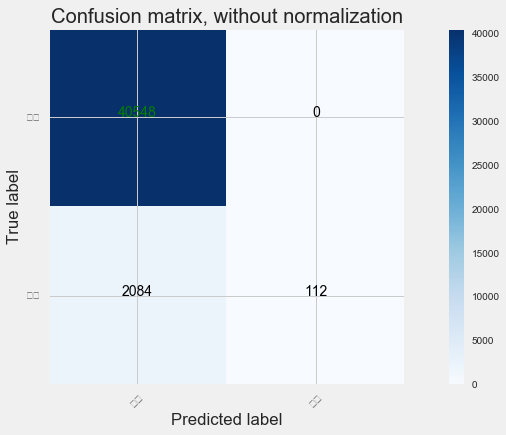

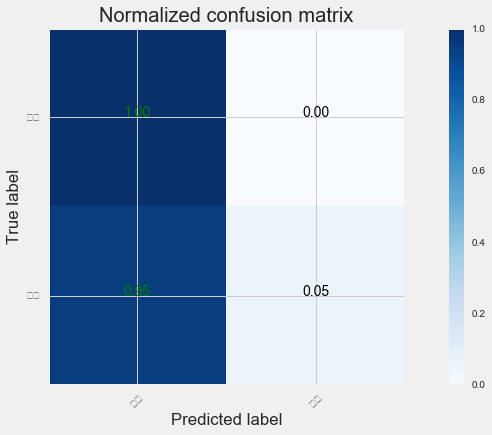

In [117]:
import itertools

#class_names = ['normality', 'overdue']
class_names = ['正常', '逾期']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [118]:
from sklearn import metrics
y = np.array(Y_test)

from sklearn.metrics import roc_auc_score

# 计算预测样本的置信度分数
# y_score = lr.decision_function(X_test)

y_score = lr.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_score[:,1])  # 这里不太懂，年后再继续吧！！！2018-02-12

# 新增-2018/02/27
#for i in range(n_classes):
#    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#    roc_auc[i] = auc(fpr[i], tpr[i])


roc = metrics.auc(fpr, tpr)
# print('Y预测：',y)
# print('PRED预测：',pred)
print('AUC =',roc)

AUC = 0.730190970453


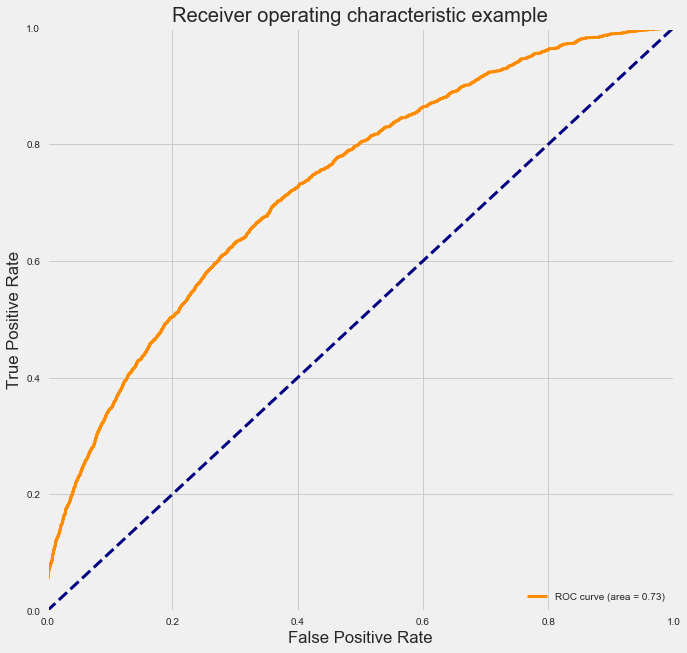

In [119]:
plt.figure()  
lw = 3  
plt.figure(figsize=(10,10))  
plt.plot(fpr, tpr, color='darkorange',  
         lw=lw, label='ROC curve (area = %0.2f)' % roc) ###假正率为横坐标，真正率为纵坐标做曲线  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()

In [120]:
predictions_prob = pd.DataFrame(lr.predict_proba(X_test))  # 返回模型中每个类的样本概率，其中类按照原样排序self.classes_.
predictions_prob['y'] = Y_test.get_values()  # 目标变量的实际值
predictions_prob['y_pred'] = pd.DataFrame(lr.predict(X_test))  # Y_test.get_values()  # 目标变量的预测值
predictions_prob.head(10)

,0,1,y,y_pred
0,0.986897,0.013103,0,0
1,0.985610,0.014390,0,0
2,0.954657,0.045343,0,0
3,0.928274,0.071726,0,0
4,0.967368,0.032632,0,0
5,0.935416,0.064584,0,0
6,0.972909,0.027091,0,0
7,0.863403,0.136597,1,0
8,0.836278,0.163722,0,0
9,0.946817,0.053183,0,0


In [121]:
# KS值计算
def plot_KS_figure(predictions_prob):    
    KS = pd.DataFrame({'thresholds' : np.arange(0,1.1,0.1)},columns = ['thresholds','FP','TN','TP','FN'])
    for m in np.arange(0,1.1,0.1):        
        # 预测为1，但实际却为0
        KS['FP'][KS['thresholds'] == m] = predictions_prob[1][(predictions_prob[1] >= m) & (predictions_prob['y'] == 0)].count()
        # 预测为0，且实际也为0
        KS['TN'][KS['thresholds'] == m] = predictions_prob[1][(predictions_prob[1] < m) & (predictions_prob['y'] == 0)].count()
        # 预测为1，且实际也为1
        KS['TP'][KS['thresholds'] == m] = predictions_prob[1][(predictions_prob[1] >= m) & (predictions_prob['y'] == 1)].count()
        # 预测为0，但实际却为1
        KS['FN'][KS['thresholds'] == m] = predictions_prob[1][(predictions_prob[1] < m) & (predictions_prob['y'] == 1)].count()
        
    KS['FPR'] = KS['FP']/(KS['FP']+KS['TN'])
    KS['TPR'] = KS['TP']/(KS['TP']+KS['FN'])
    KS['KS']  = KS['TPR'] - KS['FPR']
    # ks_file = pd.concat([FPR,TPR,KS],axis=1)
    
    return KS # ks_file

In [122]:
KS = plot_KS_figure(predictions_prob)

In [123]:
KS

,thresholds,FP,TN,TP,FN,FPR,TPR,KS
0,0.0,40548,0,2196,0,1,1,0
1,0.1,3859,36689,741,1455,0.0951712,0.337432,0.242261
2,0.2,364,40184,212,1984,0.00897701,0.0965392,0.0875621
3,0.3,9,40539,114,2082,0.000221959,0.0519126,0.0516906
4,0.4,0,40548,112,2084,0,0.0510018,0.0510018
5,0.5,0,40548,112,2084,0,0.0510018,0.0510018
6,0.6,0,40548,112,2084,0,0.0510018,0.0510018
7,0.7,0,40548,112,2084,0,0.0510018,0.0510018
8,0.8,0,40548,112,2084,0,0.0510018,0.0510018
9,0.9,0,40548,112,2084,0,0.0510018,0.0510018


In [124]:
predictions_prob.rename(index = str,columns = {0:'P_0',1:'P_1','y':'y_test'},inplace = True)

In [125]:
predictions_prob.sort_values(by=['P_1'],ascending=False,inplace = True)

In [126]:
# 重新设置索引，并展示倒数5行
predictions_prob.reset_index(drop=True,inplace = True)

In [127]:
predictions_prob.tail(10)

,P_0,P_1,y_test,y_pred
42734,0.999145,0.000855,0,0
42735,0.999165,0.000835,0,0
42736,0.999189,0.000811,0,0
42737,0.999200,0.000800,0,0
42738,0.999208,0.000792,0,0
42739,0.999213,0.000787,0,0
42740,0.999235,0.000765,0,0
42741,0.999280,0.000720,0,0
42742,0.999457,0.000543,0,0
42743,0.999598,0.000402,0,0


In [128]:
# KS值计算
def plot_ks_figure(predictions_prob):    
    ks_file = pd.DataFrame({'thresholds' : np.arange(0,11,1)},columns = ['thresholds','bad_cnt','good_cnt','total','good_per','bad_per','ks'])
    for m in np.arange(0,1.1,0.1):        
        
        ks_file['bad_cnt'][ks_file['thresholds'] == m*10] = (predictions_prob.ix[:int(len(predictions_prob)*m),'y_test'])[predictions_prob['y_test'] == 1].count()
        
        ks_file['good_cnt'][ks_file['thresholds'] == m*10] = (predictions_prob.ix[:int(len(predictions_prob)*m),'y_test'])[predictions_prob['y_test'] == 0].count()
    
    ks_file['bad_cnt'][ks_file['thresholds'] == 0.3*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.3),'P_1'])[predictions_prob['y_test'] == 1].count()
    ks_file['good_cnt'][ks_file['thresholds'] == 0.3*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.3),'P_1'])[predictions_prob['y_test'] == 0].count()
    ks_file['bad_cnt'][ks_file['thresholds'] == 0.7*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.7),'P_1'])[predictions_prob['y_test'] == 1].count()
    ks_file['good_cnt'][ks_file['thresholds'] == 0.7*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.7),'P_1'])[predictions_prob['y_test'] == 0].count()
    ks_file['bad_cnt'][ks_file['thresholds'] == 0.6*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.6),'P_1'])[predictions_prob['y_test'] == 1].count()
    ks_file['good_cnt'][ks_file['thresholds'] == 0.6*10] = (predictions_prob.ix[:int(len(predictions_prob)*0.6),'P_1'])[predictions_prob['y_test'] == 0].count()
        
    ks_file['good_per'] = ks_file['good_cnt']/predictions_prob['y_test'][predictions_prob['y_test'] == 0].count()
    
    ks_file['bad_per'] = ks_file['bad_cnt']/predictions_prob['y_test'][predictions_prob['y_test'] == 1].count()
    
    ks_file['ks'] = abs(ks_file['good_per'] - ks_file['bad_per'])   
        
    return ks_file

In [129]:
ks_file = plot_ks_figure(predictions_prob)

In [130]:
ks_file

,thresholds,bad_cnt,good_cnt,total,good_per,bad_per,ks
0,0,1,0,NaN,0,0.000455373,0.000455373
1,1,707,3568,NaN,0.0879945,0.321949,0.233955
2,2,1065,7484,NaN,0.184571,0.484973,0.300401
3,3,1343,11481,NaN,0.283146,0.611566,0.328421
4,4,1567,15531,NaN,0.383028,0.71357,0.330543
5,5,1736,19637,NaN,0.48429,0.790528,0.306238
6,6,1873,23774,NaN,0.586317,0.852914,0.266597
7,7,2002,27919,NaN,0.688542,0.911658,0.223116
8,8,2106,32090,NaN,0.791408,0.959016,0.167609
9,9,2169,36301,NaN,0.89526,0.987705,0.092445


## KS值

In [131]:
ks_value = ks_file['ks'].max()

print('KS = ',round(ks_value,3))

KS =  0.331


## 绘制KS曲线

In [132]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示负号

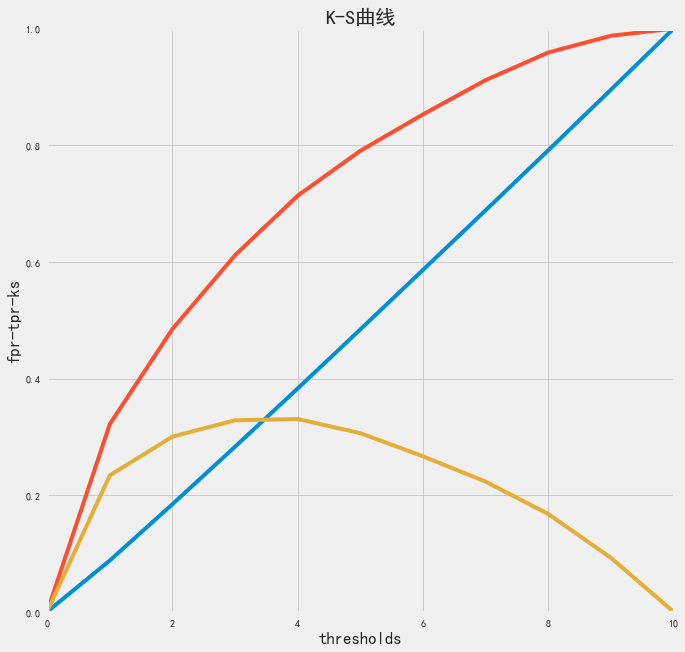

KS =  0.331


In [133]:
# K-S作图
plt.figure()  
lw = 3  
plt.figure(figsize=(10,10))  

# plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc) ###假正率为横坐标，真正率为纵坐标做曲线 
plt.plot(ks_file['thresholds'],ks_file['good_per'],label='fpr')  
plt.plot(ks_file['thresholds'],ks_file['bad_per'],label='tpr')
plt.plot(ks_file['thresholds'],ks_file['ks'],label='ks')

# label='ROC curve (area = %0.2f)' % ks_value

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0, 10])  
plt.ylim([0, 1])  
plt.xlabel('thresholds')  
plt.ylabel('fpr-tpr-ks')  
plt.title('K-S曲线')  
# plt.legend(loc="lower right")  
plt.show()

print('KS = ',round(ks_value,3))

## 评分卡生成

In [134]:
def get_lr_formula(model,X):
    '''返回回归系数和截距'''
    intercept = pd.DataFrame(model.intercept_) #截距
    coef = model.coef_.T   #模型(回归)系数(相关系数)
    coef = pd.DataFrame(coef)   
    formula = pd.concat([intercept,coef])
    index = ['Intercept']
    index = index + list(X.columns)
    formula.index = index
    formula.reset_index(inplace=True)
    formula.columns = [u'参数',u'估计值']
    return formula

In [135]:
formula = get_lr_formula(LR_model,X_train)

In [136]:
formula

,参数,估计值
0,Intercept,-2.929375
1,grade_BIN_WOE,0.761317
2,debt_settlement_flag_WOE,0.875099
3,acc_open_past_24mths_BIN_WOE,0.284354
4,verification_status_WOE,0.318138
5,mths_since_recent_inq_BIN_WOE,0.502560
6,hardship_flag_WOE,0.851894
7,mths_since_recent_bc_BIN_WOE,0.438655
8,installment_BIN_WOE,0.690566
9,all_util_BIN_WOE,-0.045182


In [137]:
# 变量的WOE值计算结果
# pd.DataFrame(woe_maps).T
# pd.DataFrame(woe_maps)

In [138]:
model_var = ['grade_BIN','debt_settlement_flag','acc_open_past_24mths_BIN','verification_status','mths_since_recent_inq_BIN',
'hardship_flag','mths_since_recent_bc_BIN','installment_BIN','all_util_BIN','inq_fi_BIN','open_il_24m_BIN','mo_sin_rcnt_tl_BIN','il_util_BIN',         
'bc_open_to_buy_BIN','dti_BIN','home_ownership_BIN','percent_bc_gt_75_BIN','mo_sin_rcnt_rev_tl_op_BIN','mo_sin_old_il_acct_BIN',
'tot_hi_cred_lim_BIN']

In [139]:
# 公司保存
woe_20 = pd.DataFrame(woe_maps)[model_var].T
# aa.to_csv('C:\\Users\\xn070576\\Desktop\\lending_club\\woe_maps0521-1.csv')

In [140]:
woe_20.index = woe_20.index + '_WOE'

In [141]:
woe_20

,0.0,1.0,2.0,3.0,4.0,5.0,7.0,36.0,60.0
grade_BIN_WOE,NaN,1.293603,-0.621085,0.063906,-1.610553,0.625069,NaN,NaN,NaN
debt_settlement_flag_WOE,-0.037831,12.824620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acc_open_past_24mths_BIN_WOE,NaN,0.552212,-0.027811,-0.391094,0.256495,-0.195901,NaN,NaN,NaN
verification_status_WOE,-0.453942,0.189002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mths_since_recent_inq_BIN_WOE,NaN,0.399951,-0.492282,-0.026462,-0.243221,0.184739,NaN,NaN,NaN
hardship_flag_WOE,-0.006589,11.092375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mths_since_recent_bc_BIN_WOE,NaN,-0.149673,0.146736,-4.405803,-0.617216,-0.038538,NaN,NaN,NaN
installment_BIN_WOE,-6.935374,-0.245845,0.012339,0.174481,0.415176,0.850821,NaN,NaN,NaN
all_util_BIN_WOE,-5.248975,0.401408,-0.378947,-0.147265,0.035037,0.217558,NaN,NaN,NaN
inq_fi_BIN_WOE,NaN,0.677578,0.024850,-0.205389,0.161758,0.371951,NaN,NaN,NaN


In [142]:
woe_20.dropna(axis=1,how='all',inplace=True)

In [143]:
woe_20.T

,grade_BIN_WOE,debt_settlement_flag_WOE,acc_open_past_24mths_BIN_WOE,verification_status_WOE,mths_since_recent_inq_BIN_WOE,hardship_flag_WOE,mths_since_recent_bc_BIN_WOE,installment_BIN_WOE,all_util_BIN_WOE,inq_fi_BIN_WOE,open_il_24m_BIN_WOE,mo_sin_rcnt_tl_BIN_WOE,il_util_BIN_WOE,bc_open_to_buy_BIN_WOE,dti_BIN_WOE,home_ownership_BIN_WOE,percent_bc_gt_75_BIN_WOE,mo_sin_rcnt_rev_tl_op_BIN_WOE,mo_sin_old_il_acct_BIN_WOE,tot_hi_cred_lim_BIN_WOE
0.0,NaN,-0.037831,NaN,-0.453942,NaN,-0.006589,NaN,-6.935374,-5.248975,NaN,NaN,NaN,-3.639537,-6.971742,-7.136045,NaN,NaN,NaN,NaN,-5.718979
1.0,1.293603,12.824620,0.552212,0.189002,0.399951,11.092375,-0.149673,-0.245845,0.401408,0.677578,6.774887,-0.218025,-0.381049,0.157726,-0.200848,0.524641,-0.251902,6.774887,6.774887,0.141456
2.0,-0.621085,NaN,-0.027811,NaN,-0.492282,NaN,0.146736,0.012339,-0.378947,0.024850,-0.092363,0.201894,-0.089116,0.041658,-0.142235,0.169832,-0.054566,0.176117,0.487418,-0.013273
3.0,0.063906,NaN,-0.391094,NaN,-0.026462,NaN,-4.405803,0.174481,-0.147265,-0.205389,0.430499,-3.578821,0.086631,-0.143888,0.107947,-0.184611,0.074517,-0.264259,-0.083437,-0.173980
4.0,-1.610553,NaN,0.256495,NaN,-0.243221,NaN,-0.617216,0.415176,0.035037,0.161758,-0.304157,0.021919,0.213546,-0.367336,0.323396,0.105684,1.749055,6.774887,-0.022814,-0.239712
5.0,0.625069,NaN,-0.195901,NaN,0.184739,NaN,-0.038538,0.850821,0.217558,0.371951,0.116680,-0.543945,0.063691,-0.558054,-0.063324,-4.332684,0.166802,0.019659,0.243812,-0.423564


In [152]:
WOE0521 = pd.read_csv(r'C:\Users\xn070576\Desktop\lending_club\WOE0524.csv')
# WOE0521 = pd.read_csv(r'C:\Users\Administrator\Desktop\lending_club_data\WOE0521.csv')

In [153]:
WOE0521.head(10)

,var_name,interval,WOE
0,grade_BIN_WOE,1,1.293603
1,grade_BIN_WOE,2,-0.621085
2,grade_BIN_WOE,3,0.063906
3,grade_BIN_WOE,4,-1.610553
4,grade_BIN_WOE,5,0.625069
5,debt_settlement_flag_WOE,0,-0.037831
6,debt_settlement_flag_WOE,1,12.824620
7,acc_open_past_24mths_BIN_WOE,1,0.552212
8,acc_open_past_25mths_BIN_WOE,2,-0.027811
9,acc_open_past_26mths_BIN_WOE,3,-0.391094


In [154]:
formula

,参数,估计值
0,Intercept,-2.929375
1,grade_BIN_WOE,0.761317
2,debt_settlement_flag_WOE,0.875099
3,acc_open_past_24mths_BIN_WOE,0.284354
4,verification_status_WOE,0.318138
5,mths_since_recent_inq_BIN_WOE,0.502560
6,hardship_flag_WOE,0.851894
7,mths_since_recent_bc_BIN_WOE,0.438655
8,installment_BIN_WOE,0.690566
9,all_util_BIN_WOE,-0.045182


In [155]:
def make_scorecard(formular,woe,basescore=600.0,base_odds=20.0/1.0,pdo=20.0):
    """
    一般行业规则，一般设定当odds为50时，score为600
    Odds翻倍时，score+20
    score = -(woe*b +a/n)*factor + offset/n
    factor = pdo/np.log(2)
    offset = basescore - factor*np.log(base_odds)

    """
    a = formular[formular[u"参数"] == "Intercept"].ix[0,u"估计值"]
    formular = formular.iloc[1:,:]
    n = float(len(formular))
    factor = pdo/np.log(2)
    offset = basescore - factor*np.log(base_odds)
    #生成评分卡
    scorecard = pd.DataFrame()
    for i in formular[u"参数"]:
        woe_frame = woe[woe['var_name'] == i][['var_name','interval','WOE']]
        beta_i = formular[formular[u"参数"] == i][u"估计值"].iloc[0]
        #woe_frame['score'] = woe_frame['WOE'].apply(lambda woe : offset/n - factor*(a/n-np.abs(beta_i)*woe))
        woe_frame['score'] = woe_frame['WOE'].apply(lambda woe : offset/n - factor*(a/n+beta_i*woe))
        scorecard = pd.concat((scorecard,woe_frame),axis=0)
        
    return scorecard

In [156]:
card = make_scorecard(formula,WOE0521,basescore=600.0,base_odds=20.0/1.0,pdo=20.0)

In [157]:
card

,var_name,interval,WOE,score
0,grade_BIN_WOE,1,1.293603,1.487724
1,grade_BIN_WOE,2,-0.621085,43.547623
2,grade_BIN_WOE,3,0.063906,28.500447
3,grade_BIN_WOE,4,-1.610553,65.283241
4,grade_BIN_WOE,5,0.625069,16.173394
5,debt_settlement_flag_WOE,0,-0.037831,30.859507
6,debt_settlement_flag_WOE,1,12.824620,-293.917572
7,acc_open_past_24mths_BIN_WOE,1,0.552212,25.373513
12,verification_status_WOE,0,-0.453942,34.071245
13,verification_status_WOE,1,0.189002,28.169320


In [158]:
# card.to_csv('C:\\Users\\Administrator\\Desktop\\lending_club_data\\ScoreCard0521.csv')

card.to_csv('C:\\Users\\xn070576\Desktop\\lending_club\\ScoreCard0524.csv')

## Embedded

我们需要对特征的权重有一个正确的评判和排序，就可以通过特征重要性排序来挖掘哪些变量是比较重要的，降低学习难度，最终达到优化模型计算的目的。这里，我们采用的是随机森林算法判定特征的重要性。

## 入模变量选择方法

#### 筛选入模变量的依据：
#### 1）因变量变量间相关性弱，共线性低.
#### 2）因变量与目标变量间的相关性高，因变量的IV值高.
#### 3）通过随机森林筛选变量，变量的重要性排序靠前.

一般评分卡开发的时候有必要根据一定标准，筛选变量，以提高模型的质量，变量选择方法上主要有向前选择、向后选择，逐步选择三种。三种自动选择方法简单介绍如下：

一、向前选择forward：首先仅将截距项纳入模型进行拟合，然后逐步将变量一个一个放入模型，并计算相应的指标(可以是各个x的wald卡方，或者模型的贝叶斯信息BIC、赤池信息AIC，指标具体公式不在此赘述)，如果指标值符合一定条件，例如加入x后BIC变小，则保留x在模型中，然后再放入下一个变量，每一个变量一旦纳入就不会移除，直到没有符合条件的变量纳入或者所有的变量都纳入模型。

二、向后选择backward：与向前选择顺序相反，向后选择一开始就将所有变量纳入模型，然后挨个移除指标值符合条件不符合条件的变量，直到留下所有指标值合格的变量为止。

三、逐步选择stepwise：该算法是向前选择和向后选择的结合，首先仅将截距项纳入模型进行拟合，然后逐步移入最优的变量，移除最差的变量。